### Hello! Welcome to my portfolio, I’m Sals.

As a final project that will complete my journey through a virtual internship at Kalbe Nutritionals, I will develop predictive data models to improve the company's business such as optimizing business competitive strategies or creating regression and clustering analysis, then preparing visual media to present solutions to clients.

I invite you to explore my portfolio and review my work. As I believe in continuous learning and growth, I am open to any thoughts or recommendations you may have.

Feel free to connect and reach me on [Linked In](https://www.linkedin.com/in/salsabila-mardhiyah/)!

### Setup

In [185]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, jaccard_score, log_loss, confusion_matrix, fbeta_score
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import get_scorer_names
# from skopt import BayesSearchCV

import shap

import warnings 
warnings.filterwarnings('ignore')

### Importing Data

In [2]:
# Max rows and columns setting
pd.set_option('display.max_columns', None) # Display all columns
pd.set_option('display.max_rows', None) # Display all rows
pd.set_option('max_colwidth', None) # Display columns full width

In [3]:
# Importing dataset
df = pd.read_csv('data/loan_data_2007_2014.csv')
df.sample()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
156593,156593,3725193,4717427,21125,21125,21050.0,60 months,16.29,516.98,C,C4,CA Community Colleges Chancellors Office,4 years,MORTGAGE,53350.0,Verified,Apr-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=3725193,NaN,debt_consolidation,Debt Consolidation,956xx,CA,19.1,0.0,Nov-00,0.0,NaN,NaN,8.0,0.0,15306,72.9,8.0,f,0.0,0.0,26212.34179,26119.3,21125.0,5087.34,0.0,0.0,0.0,Dec-14,16395.53,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,161235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21000.0,NaN,NaN,NaN


In [4]:
# Importing feature explaination
explanation = pd.read_csv('data/LCDataDictionary.xlsx - LoanStats.csv')
explanation.drop('Unnamed: 2',axis=1)

,Unnamed: 0,Description
0,_rec,The total amount committed by investors for that loan at that point in time.
1,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,collection_recovery_fee,post charge off collection fee
8,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
9,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


### 1. Data Exploration

#### 1.1 Descriptive Analysis

##### 1.1.1 Checking Data Shape

In [5]:
# Defining numerical and categorical list of columns
num_col = df.describe().columns
cat_col = df.describe(exclude='number').columns

In [6]:
# Checking initial shape of data
print(f'Data cosists of {df.shape[0]} rows and {df.shape[1]} columns')
print(f'''({num_col.value_counts().sum()} numeric columns and {cat_col.value_counts().sum()} categorical columns)''')

Data cosists of 466285 rows and 75 columns
(53 numeric columns and 22 categorical columns)


##### 1.1.2 Checking Missing Data

In [7]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [8]:
# Checking missing values percentage
missing = pd.DataFrame({'missing_values': df.isna().sum().sort_values(ascending=False),
                        'percentage': round(df.isna().sum().sort_values(ascending=False)/df.shape[0]*100)
                        })
missing

,missing_values,percentage
inq_last_12m,466285,100.0
total_bal_il,466285,100.0
dti_joint,466285,100.0
verification_status_joint,466285,100.0
annual_inc_joint,466285,100.0
open_acc_6m,466285,100.0
open_il_6m,466285,100.0
open_il_12m,466285,100.0
open_il_24m,466285,100.0
mths_since_rcnt_il,466285,100.0


There are 17 features with 100% null value, therefore we will drop the columns

In [9]:
# Dropping columns with 100% null values
df.dropna(how='all', inplace=True, axis=1)

# Checking data shape
df.shape

(466285, 58)

##### 1.1.3 Checking Duplicated Data

In [10]:
# Checking duplicated values
df.duplicated().sum()

0

There is no duplicated values

##### 1.1.4 Removing Unnecessary Data

In [11]:
# Defining numerical and categorical list of columns
num_col = df.describe().columns
cat_col = df.describe(exclude='number').columns

In [12]:
# Checking descriptive statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [13]:
# Checking unique values on numerical column
for col in num_col:
    print(f'{col} Unique Values: {df[col].unique().shape[0]}')
    print('-' * 30)

Unnamed: 0 Unique Values: 466285
------------------------------
id Unique Values: 466285
------------------------------
member_id Unique Values: 466285
------------------------------
loan_amnt Unique Values: 1352
------------------------------
funded_amnt Unique Values: 1354
------------------------------
funded_amnt_inv Unique Values: 9854
------------------------------
int_rate Unique Values: 506
------------------------------
installment Unique Values: 55622
------------------------------
annual_inc Unique Values: 31902
------------------------------
dti Unique Values: 3997
------------------------------
delinq_2yrs Unique Values: 25
------------------------------
inq_last_6mths Unique Values: 29
------------------------------
mths_since_last_delinq Unique Values: 146
------------------------------
mths_since_last_record Unique Values: 124
------------------------------
open_acc Unique Values: 63
------------------------------
pub_rec Unique Values: 27
------------------------------

In [14]:
# Checking descriptive statistics for categorical columns
df.describe(exclude='number').T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [15]:
# Checking some of categorical column values
some_of_cats = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'initial_list_status']
for cat in some_of_cats:
    print(f'{df[cat].value_counts()}')
    print('-' * 30)

 36 months    337953
 60 months    128332
Name: term, dtype: int64
------------------------------
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64
------------------------------
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64
------------------------------
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64
------------------------------
Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype: int64
------------------------------
Current                                                224226
Fully Paid                                             184739
Charged Off               

These features are going to be dropped because of specific reason:
| Unnecessary Columns               | Causes                |
|-----------------------------------|-----------------------|
| `desc`                            | free text             |
| `url`, `id`, `member_id`          | all values are unique |
| `title`, `emp_title`, `addr_state`, `earliest_cr_line`, `zip_code`              | high cardinality      |
| `Unnamed: 0`                      | index                 |
| `policy_code`, `application_type` | one unique value      |
|  `sub_grade`, `int_rate` | redundant      |
| `pymnt_plan` | one dominant category       |

In [16]:
# Make list of features about to drop
drop_cols = [
            'desc', 'url', 'id', 'zip_code', 'sub_grade',
            'member_id', 'title', 'emp_title', 'int_rate',
            'Unnamed: 0', 'policy_code', 'application_type',
            'pymnt_plan', 'earliest_cr_line', 'addr_state'
            ]

# Dropping features
df_dropped = df.drop(labels=drop_cols, axis=1, inplace=False)

# Checking df shape
df_dropped.shape

(466285, 43)

In [189]:
df_dropped.columns

Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'next_pymnt_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In this project, we're building machine learning model with objective to classify wether a loan is risky and not risky before the loan can be accepted. Therefore, by selecting the features that appear after the loan accepted may indicate Data Leakage. As quoted from this [source](https://dataskeptic.com/blog/episodes/2016/leakage), "if any other feature whose value would not actually be available in practice at the time you'd want to use the model to make a prediction, is a feature that can introduce leakage to your model". 

In this case, we will drop the features that indicates leakage from the future data and choose the available features adopted from the initial stage of loan application.

In [17]:
# Make list of features indicates leakage from the future data
drop_cols = [
            'out_prncp',
            'out_prncp_inv',
            'total_pymnt',
            'total_pymnt_inv',
            'total_rec_prncp', 
            'total_rec_int', 
            'total_rec_late_fee', 
            'recoveries', 
            'collection_recovery_fee', 
            'last_pymnt_d', 
            'last_pymnt_amnt',
            'funded_amnt',
            'funded_amnt_inv',
            'issue_d',
            'last_credit_pull_d'
            ]

# Dropping features
df_dropped = df_dropped.drop(labels=drop_cols, axis=1, inplace=False)

# Checking df shape
df_dropped.shape

(466285, 28)

#### 1.2 Univariate Analysis

##### 1.2.1 Target Label

We are building machine learning to classify whether a loan is bad (risky/charged off) and good (not risky/fully paid) using the final status of the loan and not the ongoing loan because there is no certainty of the outcome of the ongoing loan. Therefore in this dataset, there are 9 types of loan status, namely:
1. Current
2. In Grace Period (Late 1-15 days)
3. Late (16-30 days)
4. Late (31-120 days)
5. Default (Late 131-150 days)
6. Charged Off (Late 150+ days)
7. Fully Paid
8. Does not meet the credit policy. Status:Fully Paid 
    
    (While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace) 
9. Does not meet the credit policy. Status:Charged Off 

    (While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace)

The first until the 5th status indicates that the loan is still ongoing, While Fully Paid and Charged-Off means the final outcome of a loan. As quoted from [this](https://www.forbes.com/advisor/credit-cards/what-is-a-charge-off/) source, "a charge-off is a declaration by a creditor that an outstanding debt is unlikely to be collected". 

While Default also has similar impact, it still ongoing and has small chance to be paid. So we only choose Charged-Off as the final outcome of a risky loan.

In [18]:
# Checking value count of each loan status and percentage of data
status, count = df_dropped["loan_status"].value_counts().index, df_dropped["loan_status"].value_counts().values
percent = df_dropped["loan_status"].value_counts().values/df_dropped.shape[0]*100
pd.DataFrame({'Loan Status': status,'Count': count, 'Percentage':percent})[['Loan Status','Count', 'Percentage']]

,Loan Status,Count,Percentage
0,Current,224226,48.087757
1,Fully Paid,184739,39.619332
2,Charged Off,42475,9.109236
3,Late (31-120 days),6900,1.479782
4,In Grace Period,3146,0.674695
5,Does not meet the credit policy. Status:Fully Paid,1988,0.426349
6,Late (16-30 days),1218,0.261214
7,Default,832,0.178432
8,Does not meet the credit policy. Status:Charged Off,761,0.163205


Now we will simplify the loan status into a binary classification of Fully Paid or Charged loans by eliminating rows with other statuses. This implies that we must discard roughly 50% of our data, but let's emphasize that we are not interested in any statuses that show that the loan is ongoing or in progress, as presuming that anything is in progress doesn't tell us anything.

In [19]:
# Selecting loan_status with Fully Paid or Charged Off values
df_two_class = df_dropped[(df_dropped['loan_status'] == 'Fully Paid') | (df_dropped['loan_status'] == 'Charged Off')]
df_two_class.sample(3)

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
361705,18000,60 months,434.01,D,1 year,RENT,50800.0,Source Verified,Charged Off,debt_consolidation,4.53,0.0,0.0,NaN,NaN,6.0,0.0,6934,64.2,8.0,f,NaN,0.0,NaN,0.0,0.0,6934.0,10800.0
121692,12000,36 months,421.18,C,10+ years,RENT,70000.0,Not Verified,Fully Paid,credit_card,26.91,0.0,1.0,NaN,NaN,26.0,0.0,37488,87.0,38.0,f,NaN,0.0,NaN,0.0,0.0,41420.0,43100.0
435717,9600,36 months,326.48,C,3 years,MORTGAGE,103000.0,Not Verified,Charged Off,credit_card,22.36,1.0,1.0,18.0,NaN,16.0,0.0,11605,46.2,30.0,w,NaN,0.0,NaN,0.0,449.0,219159.0,32000.0


Therefore, we can transform Charged Off values to 1 as bad loan and Fully Paid values to 0 as good loan.

In [20]:
# Replace target values
mapping_loan = {'loan_status':{ 'Fully Paid': 0, 'Charged Off': 1}}
df_two_class = df_two_class.replace(mapping_loan)

In [21]:
# Checking value count of each loan status and percentage of data
status, count = df_two_class["loan_status"].value_counts().index, df_two_class["loan_status"].value_counts().values
percent = df_two_class["loan_status"].value_counts().values/df_two_class.shape[0]*100
pd.DataFrame({'Loan Status': status,'Count': count, 'Percentage':percent})[['Loan Status','Count', 'Percentage']]

,Loan Status,Count,Percentage
0,0,184739,81.30617
1,1,42475,18.69383


From label count checking, there are 81% good loan and 19% bad loan. We will handle it with oversampling/undersampling method later.

In [22]:
# Checking missing values percentage
missing = pd.DataFrame({'missing_values': df_two_class.isna().sum().sort_values(ascending=False),
                        'percentage': round(df_two_class.isna().sum().sort_values(ascending=False)/df_two_class.shape[0]*100)
                        })
missing

,missing_values,percentage
next_pymnt_d,227214,100.0
mths_since_last_record,200569,88.0
mths_since_last_major_derog,187196,82.0
mths_since_last_delinq,128059,56.0
tot_cur_bal,63708,28.0
tot_coll_amt,63708,28.0
total_rev_hi_lim,63708,28.0
emp_length,8673,4.0
revol_util,186,0.0
collections_12_mths_ex_med,56,0.0


Our most recent data frame's missing values check revealed some features with more than 50% missing value. Avoiding adding bias when handling missing values, We shall thus remove those features and left with features that has missing values not more than 50%.

In [23]:
# Make list of features have more then 50% missing values
drop_cols = [
            'next_pymnt_d',
            'mths_since_last_record',
            'mths_since_last_major_derog',
            'mths_since_last_delinq'
            ]

# Dropping features
df_two_class =df_two_class.drop(labels=drop_cols, axis=1, inplace=False)

# Checking df shape
df_two_class.shape

(227214, 24)

##### 1.2.2 Distribution of Features

In [24]:
# Defining numerical and categorical list of columns
num_col = df_two_class.describe().columns
cat_col = df_two_class.describe(exclude='number').columns

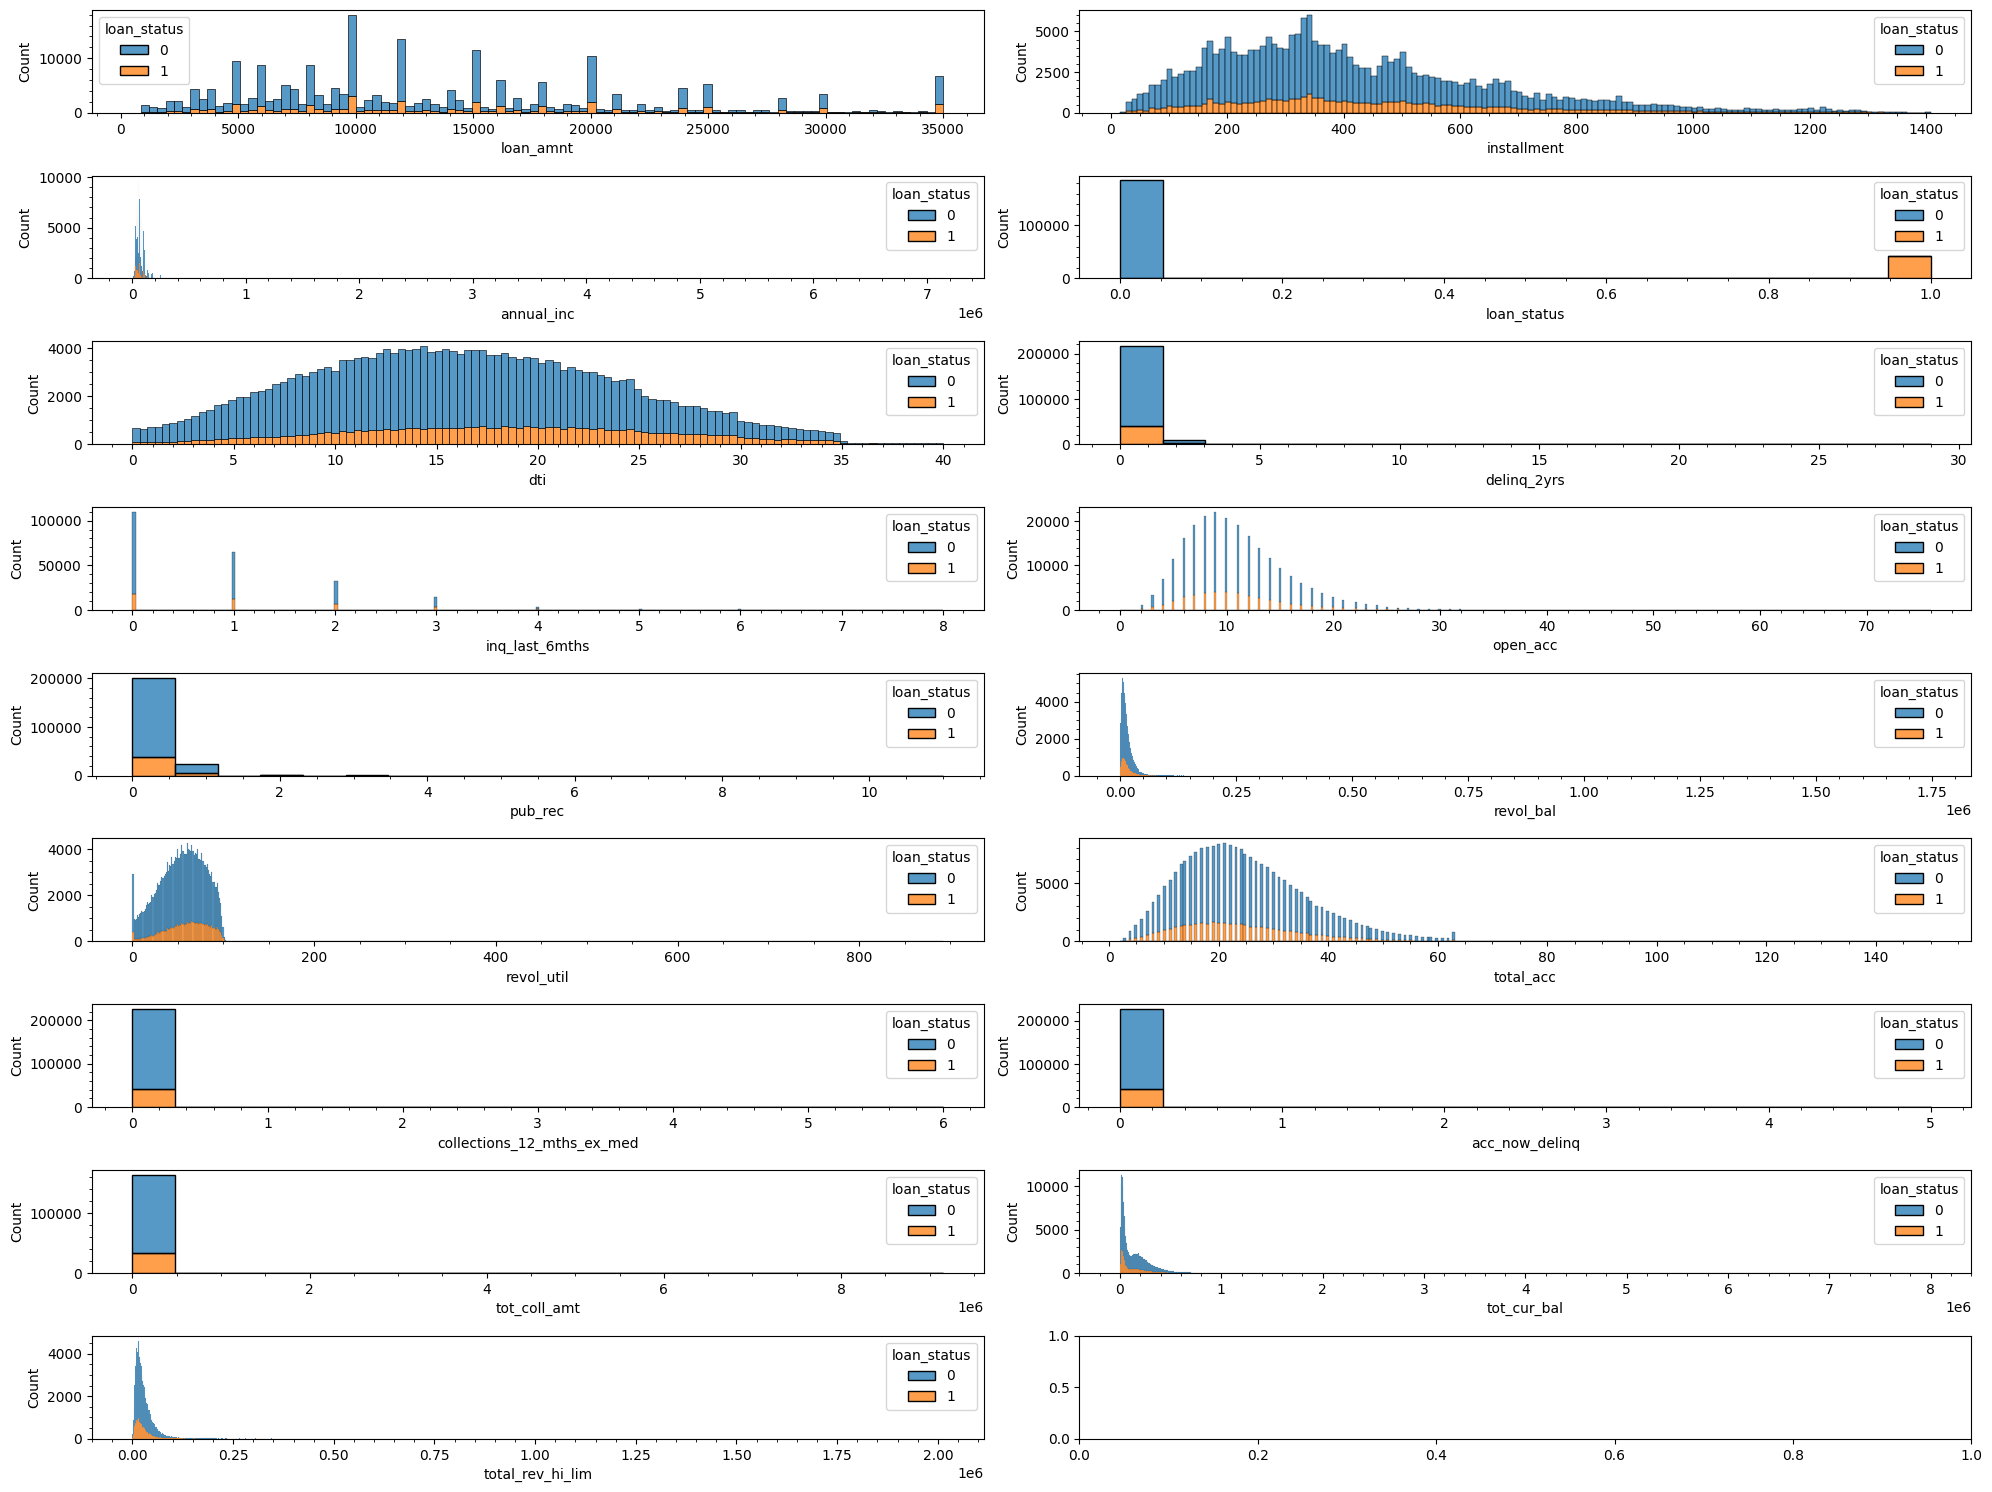

In [25]:
# histogram for numeric columns
fig, axes = plt.subplots(9, 2, figsize=(20, 15))

i = 0
for y in axes:
    try:
        for ax in y:
            column = num_col[i]
            sns.histplot(df_two_class, x=column, hue='loan_status', multiple='stack', ax=ax)
            ax.minorticks_on()
            i += 1
    except IndexError:
            pass
fig.tight_layout(pad=1)
plt.show()

We can deduce the following facts from the visualization above: 
- Some of the features seems to have similar distribution. We have to analyze from correlation matrix if those features are highly correlated. If so, the two features become redundant features since they have same information and we have to eliminate one of them.
- According to the distribution, 'acc_now_delinq', 'collections_12_mths_ex_med','tot_coll_amt','pub_rec','delinq_2yrs' features can be grouped into discrete bins or categories  to simplify the data and reduce the impact of outliers.

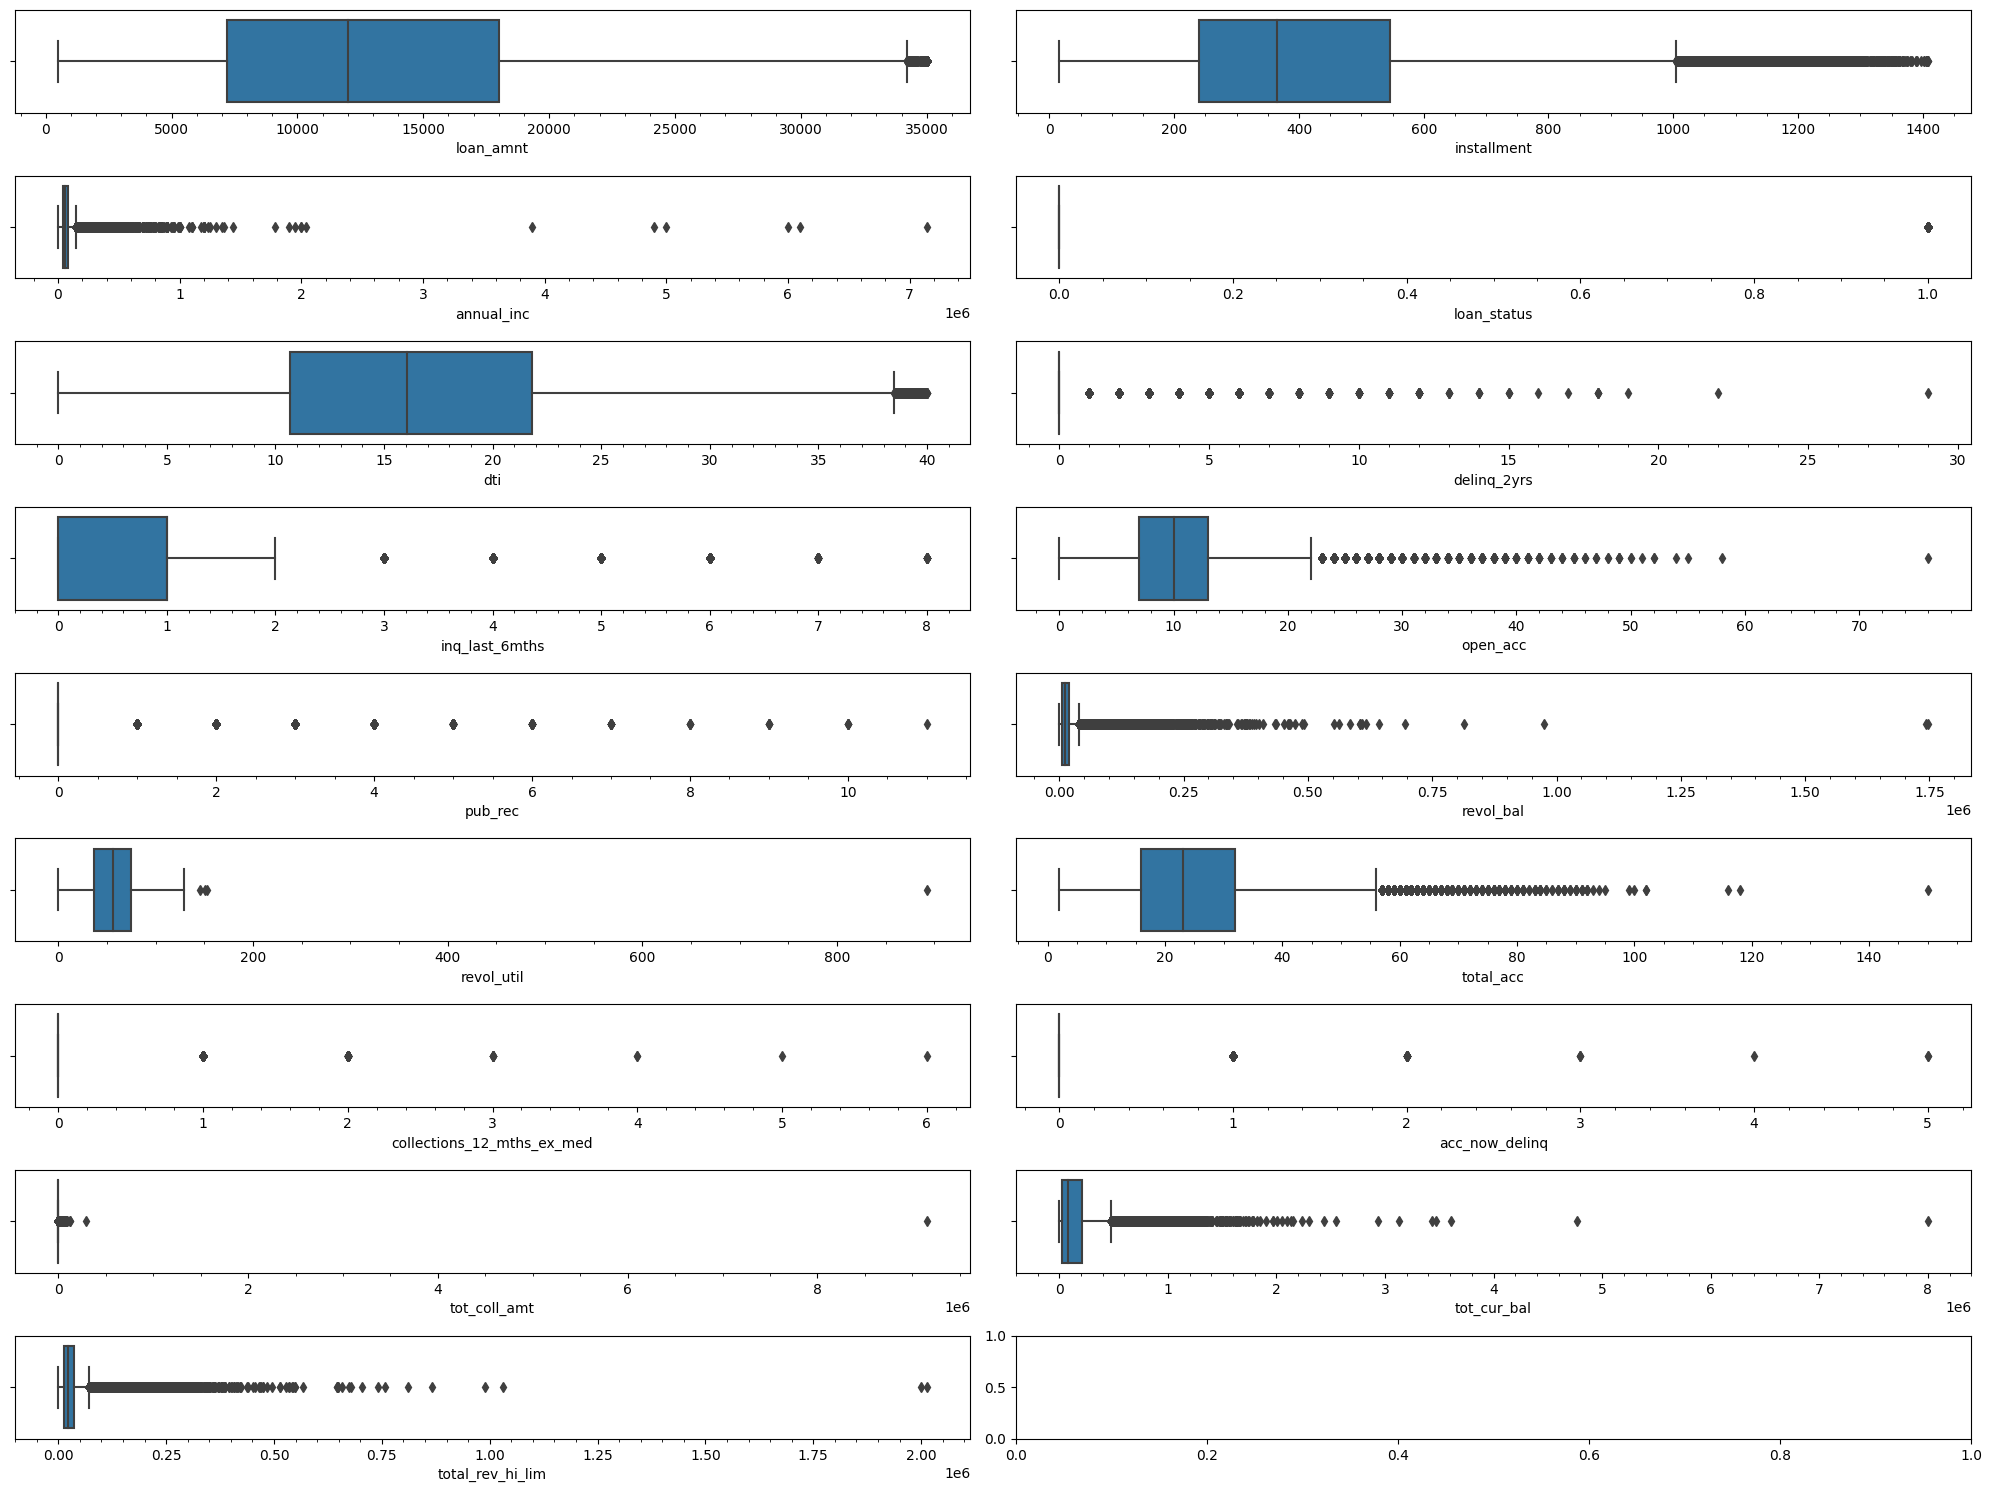

In [26]:
# boxplot for numeric columns
fig, axes = plt.subplots(9, 2, figsize=(20, 15))

i = 0
for y in axes:
    try:
        for ax in y:
            column = num_col[i]
            sns.boxplot(df_two_class, x=column, ax=ax)
            ax.minorticks_on()
            i += 1
    except IndexError:
            pass
fig.tight_layout(pad=1)
plt.show()

We can see from visualizatio above, there are many outliers in this data.

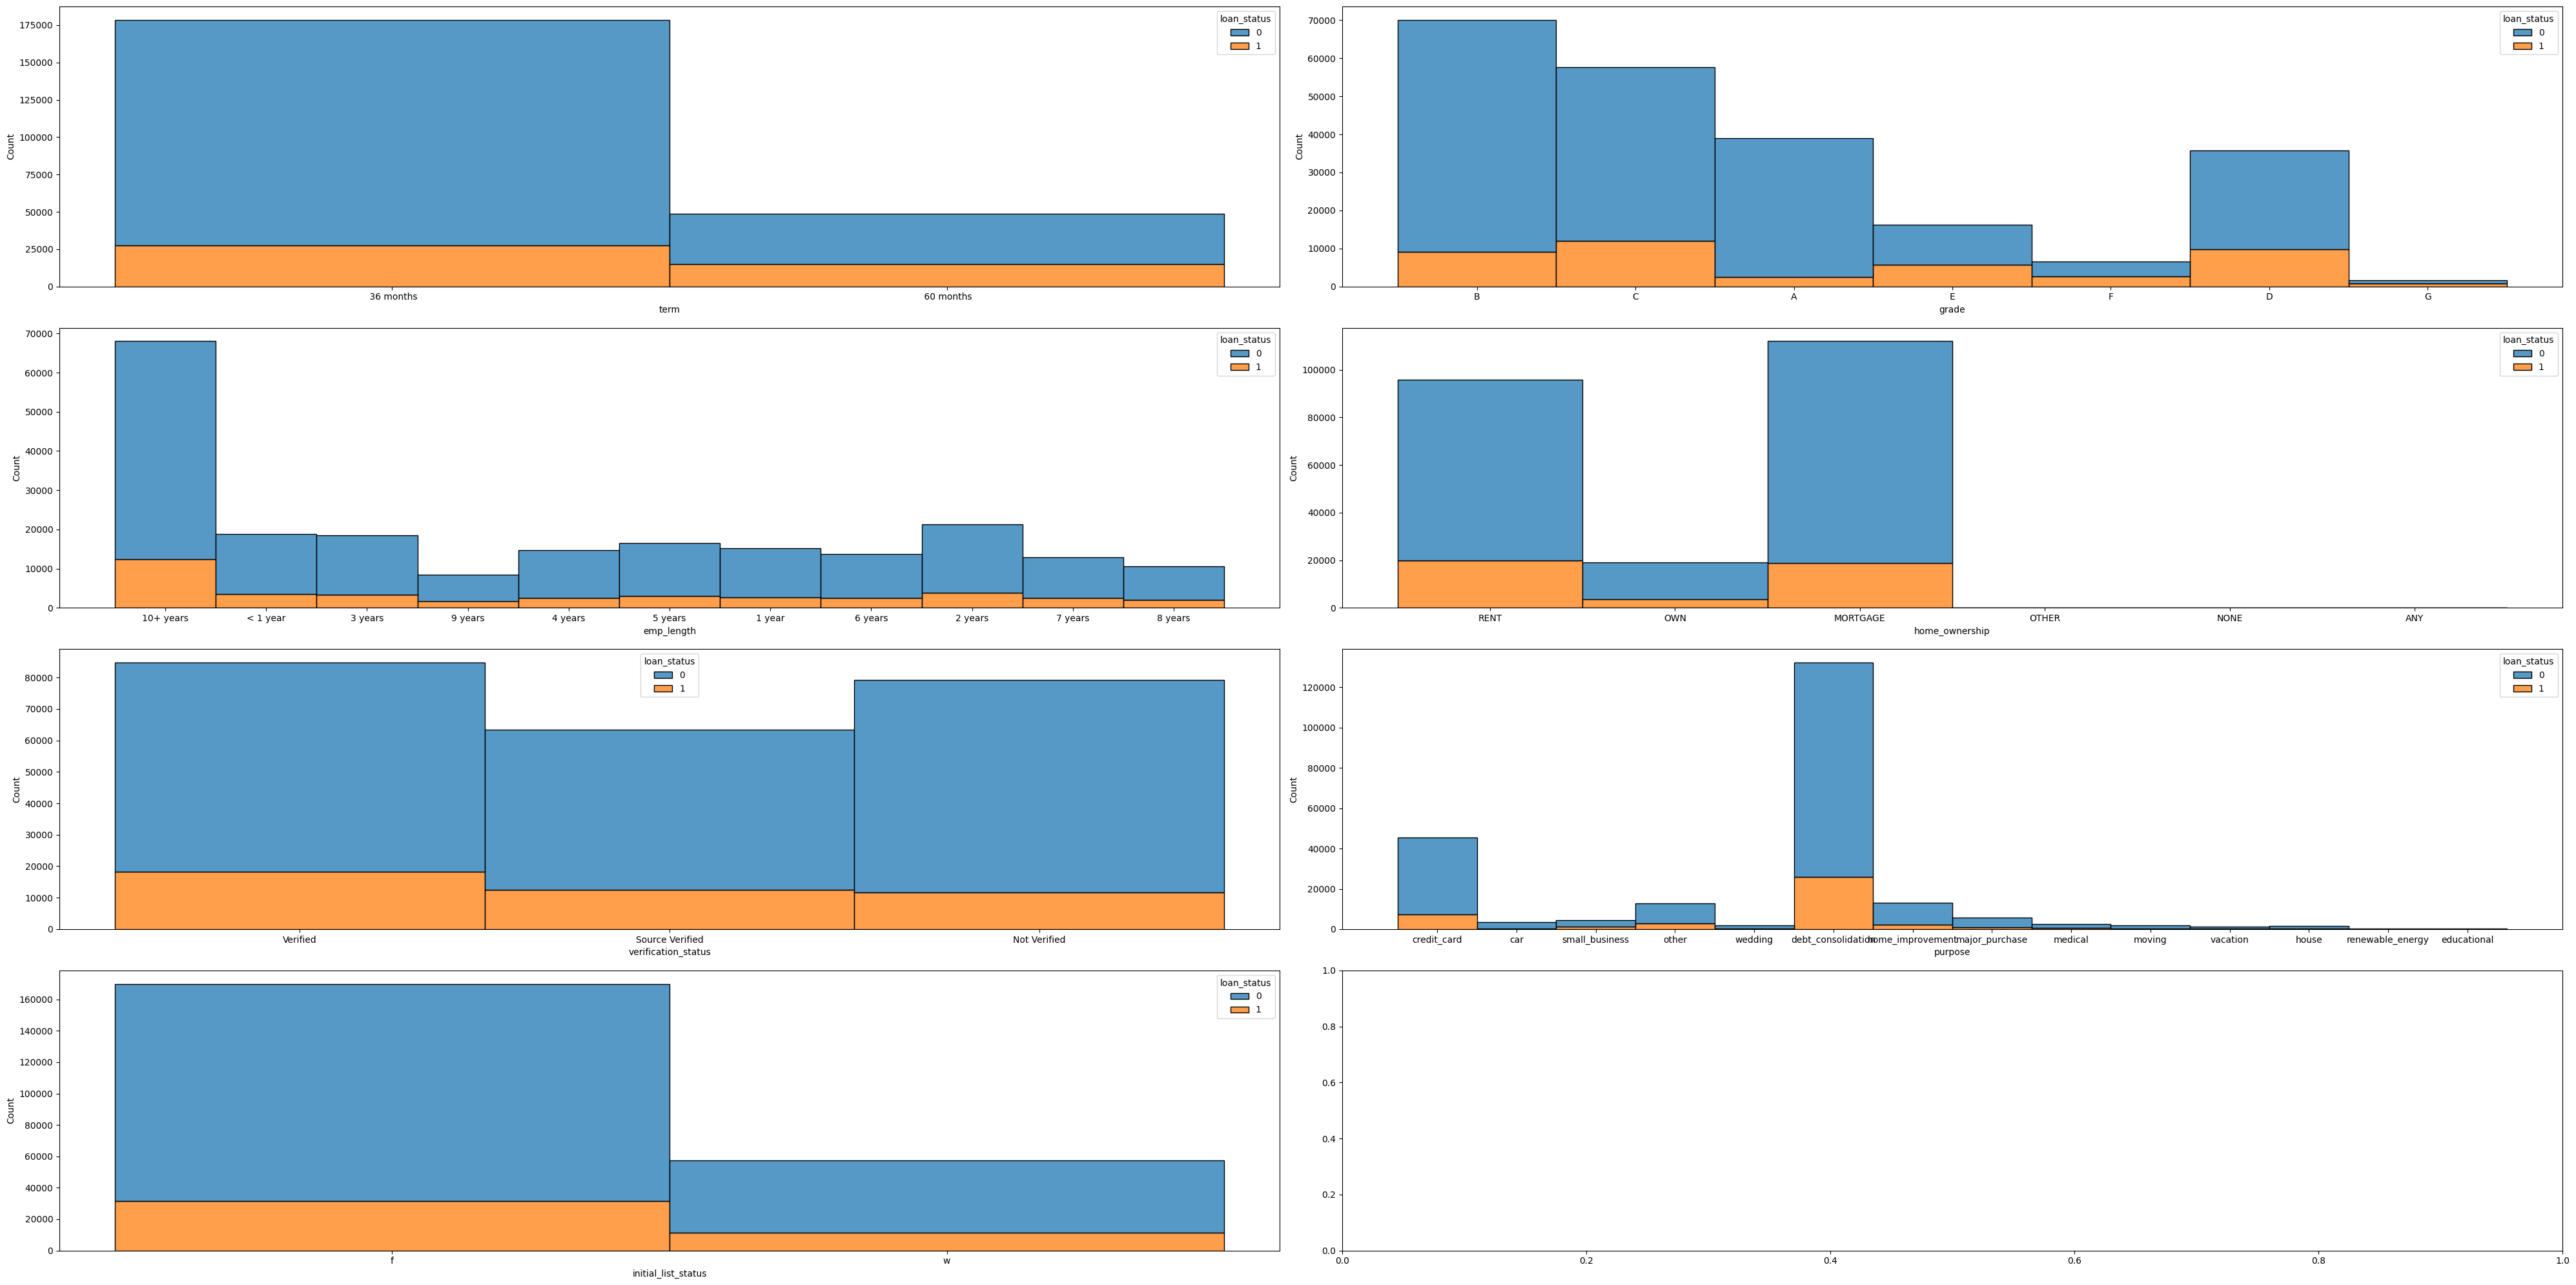

In [27]:
# Create histplot for categorical columns
fig, axes = plt.subplots(4, 2, figsize=(40, 20))

i = 0
for y in axes:
    try:
        for ax in y:
            column = cat_col[i]
            sns.histplot(df_two_class, x=column, hue='loan_status', multiple='stack', ax=ax) 
            i += 1
    except IndexError:
            pass

fig.tight_layout()
plt.show()

We can deduce the following facts from the visualization above: 
- Most loans are taken out by people with 10 years or more of employment history 
- The majority of loans are used to consolidate borrowers other debts  
- There is little difference between whole and fractional loans in terms of fully paid or charged off debt.

Several things that need to be followed up during data pre-processing:
   - For the `loan_status` column, mapping can be done so that the "Fully Paid" and "Charged Off" values become 0 and 1.
   - For the `home_ownership`, `grade`, `emp_length` column, label encoding can be done because the columns have sequential values and have an ordinal relationship between the values.
   - For the `term`, `initial_list_status`, `purpose`, and `verification_status` columns, one-hot encoding can be performed because these columns do not have an ordinal relationship between their values and each categorical value is considered equally important.

#### 1.3. Multivariate Analysis

##### 1.3.1 Correlation Heatmap

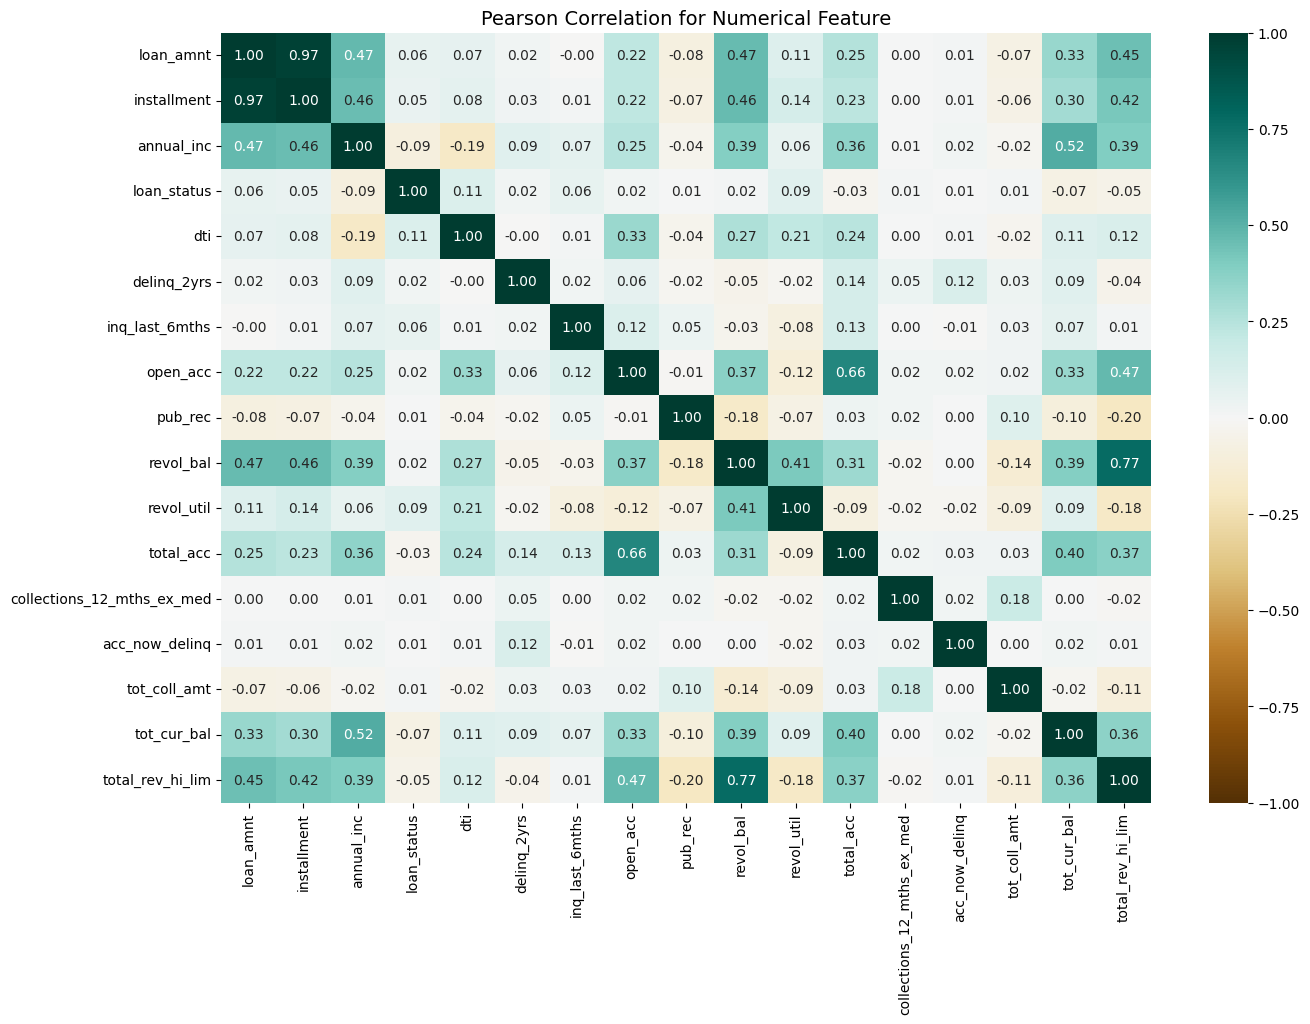

In [28]:
# Correlation heatmap with spearman
plt.figure(figsize=(15,10))
sns.heatmap(df_two_class.corr(method='spearman', numeric_only=True), annot=True, cmap='BrBG', vmin=-1, vmax=1, fmt='.2f')

plt.title('Pearson Correlation for Numerical Feature', fontsize=14)
plt.show()

Based on the results of the heatmap, the correlation between various features is made in the range 1 to -1. The closer to 1 or -1, the stronger the correlation, while the closer to 0, the weaker the correlation. Some of the most relevant correlation values are as follows:
- `installment` and `loan_amnt` have very strong correlation
- `total_rev_hi_lim`, `loan_amnt`, `installment`, `annual_inc`, `open_acc`, `total_acc`, `revol_bal`, `tot_cur_bal` have moderate to very strong correlation on each other. If multicollinearity exists, features that have a lower correlation with the target (`loan_status`) can be removed or combined with other features.

### 2. Data Preprocessing

#### 2.1 Handling Missing Values

After dropping some of features, we're about to handle the remaining missing values with Imputation Method. Here is the missing value information from all remaining features:

In [31]:
# Checking missing values percentage
missing = pd.DataFrame({'missing_values': df_two_class.isna().sum().sort_values(ascending=False),
                        'percentage': round(df_two_class.isna().sum().sort_values(ascending=False)/df_two_class.shape[0]*100)
                        })
missing

,missing_values,percentage
total_rev_hi_lim,63708,28.0
tot_cur_bal,63708,28.0
tot_coll_amt,63708,28.0
emp_length,8673,4.0
revol_util,186,0.0
collections_12_mths_ex_med,56,0.0
open_acc,0,0.0
acc_now_delinq,0,0.0
initial_list_status,0,0.0
total_acc,0,0.0


Now we are handling missing values with the Imputation Method, which imputes the mode value for categorical data and the median value for numerical data.

In [32]:
# Define features that require mode imputation
mode_col = ['emp_length']

# Define features that require median imputation
median_col = [
            'revol_util', 
            'collections_12_mths_ex_med',
            'tot_coll_amt',
            'tot_cur_bal',
            'total_rev_hi_lim'
            ]

# Copy data before imputation
df_imputed = df_two_class.copy()

# Perform mode imputation for mode_col
mode_imputer = SimpleImputer(strategy='most_frequent')
df_imputed[mode_col] = mode_imputer.fit_transform(df_imputed[mode_col])

# Perform median imputation for median_col
median_imputer = SimpleImputer(strategy='median')
df_imputed[median_col] = median_imputer.fit_transform(df_imputed[median_col])

In [33]:
# Checking missing values percentage
missing = pd.DataFrame({
                        'missing_values': df_imputed.isna().sum().sort_values(ascending=False),
                        'percentage': round(df_imputed.isna().sum().sort_values(ascending=False)/df_imputed.shape[0]*100)
                        })
missing

,missing_values,percentage
loan_amnt,0,0.0
term,0,0.0
tot_cur_bal,0,0.0
tot_coll_amt,0,0.0
acc_now_delinq,0,0.0
collections_12_mths_ex_med,0,0.0
initial_list_status,0,0.0
total_acc,0,0.0
revol_util,0,0.0
revol_bal,0,0.0


Re-checking missing values from the recent data frame, we now have no missing values in our data.

#### 2.2 Handling Outliers

In [34]:
# # Defining numerical and categorical list of columns
# num_col = df_imputed.describe().columns
# cat_col = df_imputed.describe(exclude='number').columns

In [35]:
# # check for outliers from each numeric column using the z-score test
# zscore = pd.DataFrame()
# outlier = pd.DataFrame()
# filtered_zscore = np.array([True] * len(df_imputed))

# for col in num_col:
#     zscore = abs(stats.zscore(df_imputed[col])) # calculating absolute z-scorenya
#     outlier[col] = df_imputed[col][zscore>3]
#     filtered_zscore = (zscore < 3) & filtered_zscore 

# outlier.info()

In [36]:
# # check for outliers from each numeric column using IQR
# outlier_iqr = pd.DataFrame()
# filtered_IQR = np.array([True] * len(df_imputed))

# for col in num_col:
#     Q1 = df_imputed[col].quantile(0.25)
#     Q3 = x_train[col].quantile(0.75)
#     IQR = Q3 - Q1
#     low_limit = Q1 - (IQR * 1.5) 
#     high_limit = Q3 + (IQR * 1.5) 
#     outlier_iqr[col] = df_imputed[col][(df[col] < low_limit) | (df[col] > high_limit)]
#     filtered_IQR = ((df_imputed[col] >= low_limit) & (df_imputed[col] <= high_limit)) & filtered_IQR

# outlier_iqr.info()

In [37]:
# # Dropping outlier using zscore
# print(f'Number of rows of train data before outlier filter: {len(df_imputed)}')

# # Get index of outliers
# outlier_id = outlier.index
# df_zscored = df_imputed.drop(outlier_id)

# print(f'Number of rows of train data before outlier filter: {len(df_categorized)}')
# print(f'Checks whether the number of rows x_train and y_train are the same: {len(df_categorized) == len(y_train_outlier_removed)}')

Using a z-score foundation for finding outliers, there are 2553 data from 14 features that are outliers (representing about 1.4% of the total data train), however using IQR Method, there are 5553 data from all features that are outliers (representing about 3% of the train data).

Outlier data can be removed if judged unneeded because there are not many outliers and a sizable amount of remaining data.

The z-score method was selected in this stage to identify and eliminate outlier data. Reduced from 181771 to 179218 data trains.


The box plot shows a large number of outliers in each feature. However, considering that financial datasets are complex with each data being most likely to be correct, on this occasion we will not deal with outlier problems.

Also since the dataset is complex with many features, we decided to use Decision Trees, Random Forests, and Gradient Boosting Algorithms which are generally robust to outliers in the data.

#### 2.3 Feature Extraction

Binning or categorization is a data preprocessing technique that involves grouping continuous or numerical data into discrete bins or categories. This technique is primarily used to simplify the data, reduce the impact of outliers, and make the data more manageable or suitable for specific types of analysis. 

In [38]:
# Features which will be categorized
num_cols_categorize = [
                    'acc_now_delinq',
                    'collections_12_mths_ex_med',
                    'tot_coll_amt',
                    'pub_rec',
                    'delinq_2yrs'
                    ]

In [39]:
# Checking descriptive statistics
df_imputed[num_cols_categorize].describe().T

,count,mean,std,min,25%,50%,75%,max
acc_now_delinq,227214.0,0.002786,0.057577,0.0,0.0,0.0,0.0,5.0
collections_12_mths_ex_med,227214.0,0.005752,0.082420,0.0,0.0,0.0,0.0,6.0
tot_coll_amt,227214.0,144.922624,19251.130911,0.0,0.0,0.0,0.0,9152545.0
pub_rec,227214.0,0.132919,0.418090,0.0,0.0,0.0,0.0,11.0
delinq_2yrs,227214.0,0.242784,0.722587,0.0,0.0,0.0,0.0,29.0


In [40]:
# Checking unique values on numerical column
for col in num_cols_categorize:
    print(f'{col} Unique Values: {df_imputed[col].unique().shape[0]}')
    print('-' * 30)

acc_now_delinq Unique Values: 6
------------------------------
collections_12_mths_ex_med Unique Values: 7
------------------------------
tot_coll_amt Unique Values: 3559
------------------------------
pub_rec Unique Values: 12
------------------------------
delinq_2yrs Unique Values: 22
------------------------------


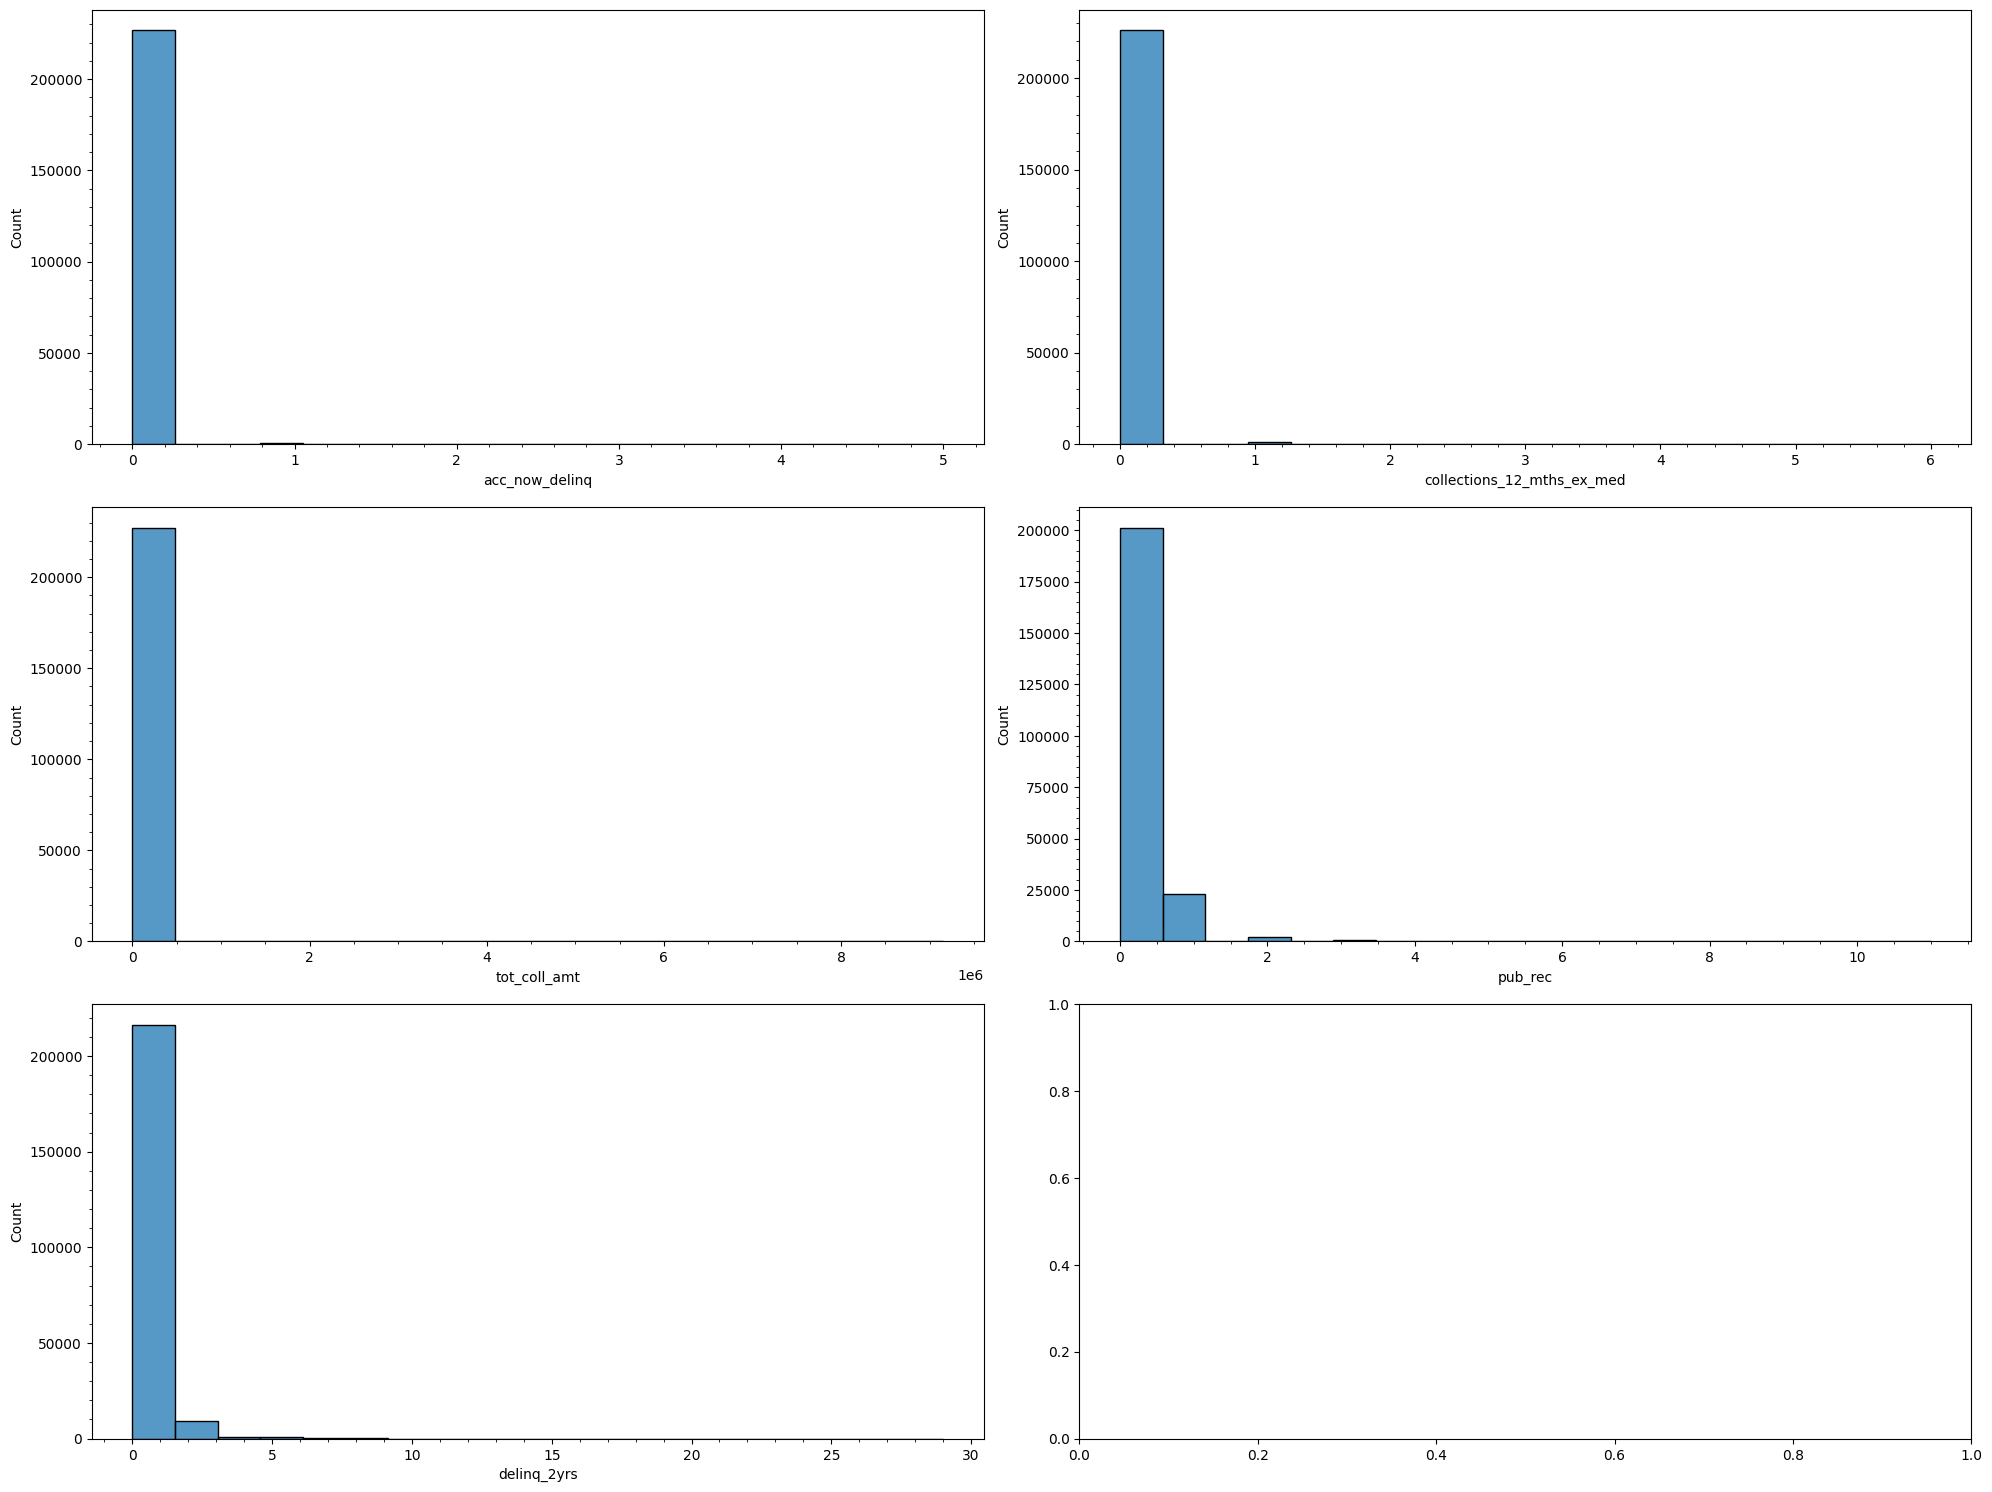

In [41]:
# histogram for numeric columns
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

i = 0
for y in axes:
    try:
        for ax in y:
            column = num_cols_categorize[i]
            sns.histplot(df_imputed, x=column, multiple='stack', ax=ax)
            ax.minorticks_on()
            i += 1
    except IndexError:
            pass
fig.tight_layout(pad=1)
plt.show()

Here we're going to use Custom Binning Discretization Methods, which allow us to define bins with specific boundaries based on domain knowledge or business requirements.

In [42]:
# Create copy for data categorization
df_categorized = df_imputed.copy()
df_categorized.shape

(227214, 24)

1. **acc_now_delinq:**
- This feature represents the number of accounts on which the borrower is currently delinquent.
- Binning this feature into categories such as "No Delinquency" (0), "Low Delinquency" (1-2), and "High Delinquency" (3 or more) could be useful. This way, we capture different levels of delinquency.


In [43]:
# categorize acc_now_delinq feature
condlist = [
            (df_categorized['acc_now_delinq'] == 0),
            (df_categorized['acc_now_delinq'] == 1) | (df_categorized['acc_now_delinq'] == 2),
            (df_categorized['acc_now_delinq'] >= 3)
            ]

choicelist = ['No Delinquency', 'Low Delinquency', 'High Delinquency']

df_categorized['acc_now_delinq'] = np.select(condlist, choicelist)

2. **collections_12_mths_ex_med:**
- This feature represents the number of collections in the last 12 months excluding medical collections.
- We can consider binning this feature into categories like "No Collections" (0) and "Collections Occurred" (1 or more) to distinguish between borrowers with and without recent collections.

In [44]:
# categorize collections_12_mths_ex_med feature
condlist = [
            (df_categorized['collections_12_mths_ex_med'] == 0),
            (df_categorized['collections_12_mths_ex_med'] >= 1)
            ]

choicelist = ['No Collections', 'Collections Occurred']

df_categorized['collections_12_mths_ex_med'] = np.select(condlist, choicelist)

3. **tot_coll_amt:**
- This feature represents the total collection amount ever owed by the borrower.
- Given the wide range of values and the presence of outliers, we might want to consider creating bins based on meaningful thresholds. For example, "No Collections" (0), "Low Collections" (1-999), "Moderate Collections" (1,000-9,999), and "High Collections" (10,000 or more).


In [45]:
# categorize tot_coll_amt feature
condlist = [
            (df_categorized['tot_coll_amt'] == 0),
            (df_categorized['tot_coll_amt'] >= 1) & (df_categorized['tot_coll_amt'] < 1000),
            (df_categorized['tot_coll_amt'] >= 1000) & (df_categorized['tot_coll_amt'] < 10000),
            (df_categorized['tot_coll_amt'] >= 10000)
            ]

choicelist = ['No Collections', 'Low Collections', 'Moderate Collections', 'High Collections']

df_categorized['tot_coll_amt'] = np.select(condlist, choicelist)

4. **pub_rec:**
- This feature represents the number of public record bankruptcies.
- Binning this feature into categories like "No Bankruptcy" (0) and "Bankruptcy Occurred" (1 or more) can help differentiate borrowers with and without bankruptcies.

In [46]:
# categorize collections_12_mths_ex_med feature
condlist = [
            (df_categorized['pub_rec'] == 0),
            (df_categorized['pub_rec'] >= 1)
            ]

choicelist = ['No Bankruptcy', 'Bankruptcy Occurred']

df_categorized['pub_rec'] = np.select(condlist, choicelist)

5. **delinq_2yrs:**
- This feature represents the number of 30+ days past-due incidences in the last 2 years.
- We can consider creating bins such as "No Delinquencies" (0), "Low Delinquencies" (1-2), and "High Delinquencies" (3 or more) to capture varying levels of delinquency.

In [47]:
# categorize tot_coll_amt feature
condlist = [
            (df_categorized['delinq_2yrs'] == 0),
            (df_categorized['delinq_2yrs'] >= 1) & (df_categorized['delinq_2yrs'] < 3),
            (df_categorized['delinq_2yrs'] >= 3)
            ]

choicelist = ['No Delinquencies', 'Low Delinquencies', 'High Delinquencies']

df_categorized['delinq_2yrs'] = np.select(condlist, choicelist)

After binning, we can convert these categorical bins into dummy variables (one-hot encoding)/label for use in machine learning models if needed.

#### 2.4 Feature Transformation

In [48]:
# List of numerical columns that will be feature enegineered using categorization/binning
# num_cols_categorize = [
#                     'acc_now_delinq',
#                     'collections_12_mths_ex_med',
#                     'tot_coll_amt',
#                     'pub_rec',
#                     'delinq_2yrs'
#                     ]

# Defining numerical and categorical list of columns
num_col = df_categorized.describe().columns.difference(['loan_status'])
cat_col = df_categorized.describe(exclude='number').columns

In [49]:
num_col.shape

(11,)

In [50]:
cat_col.shape

(12,)

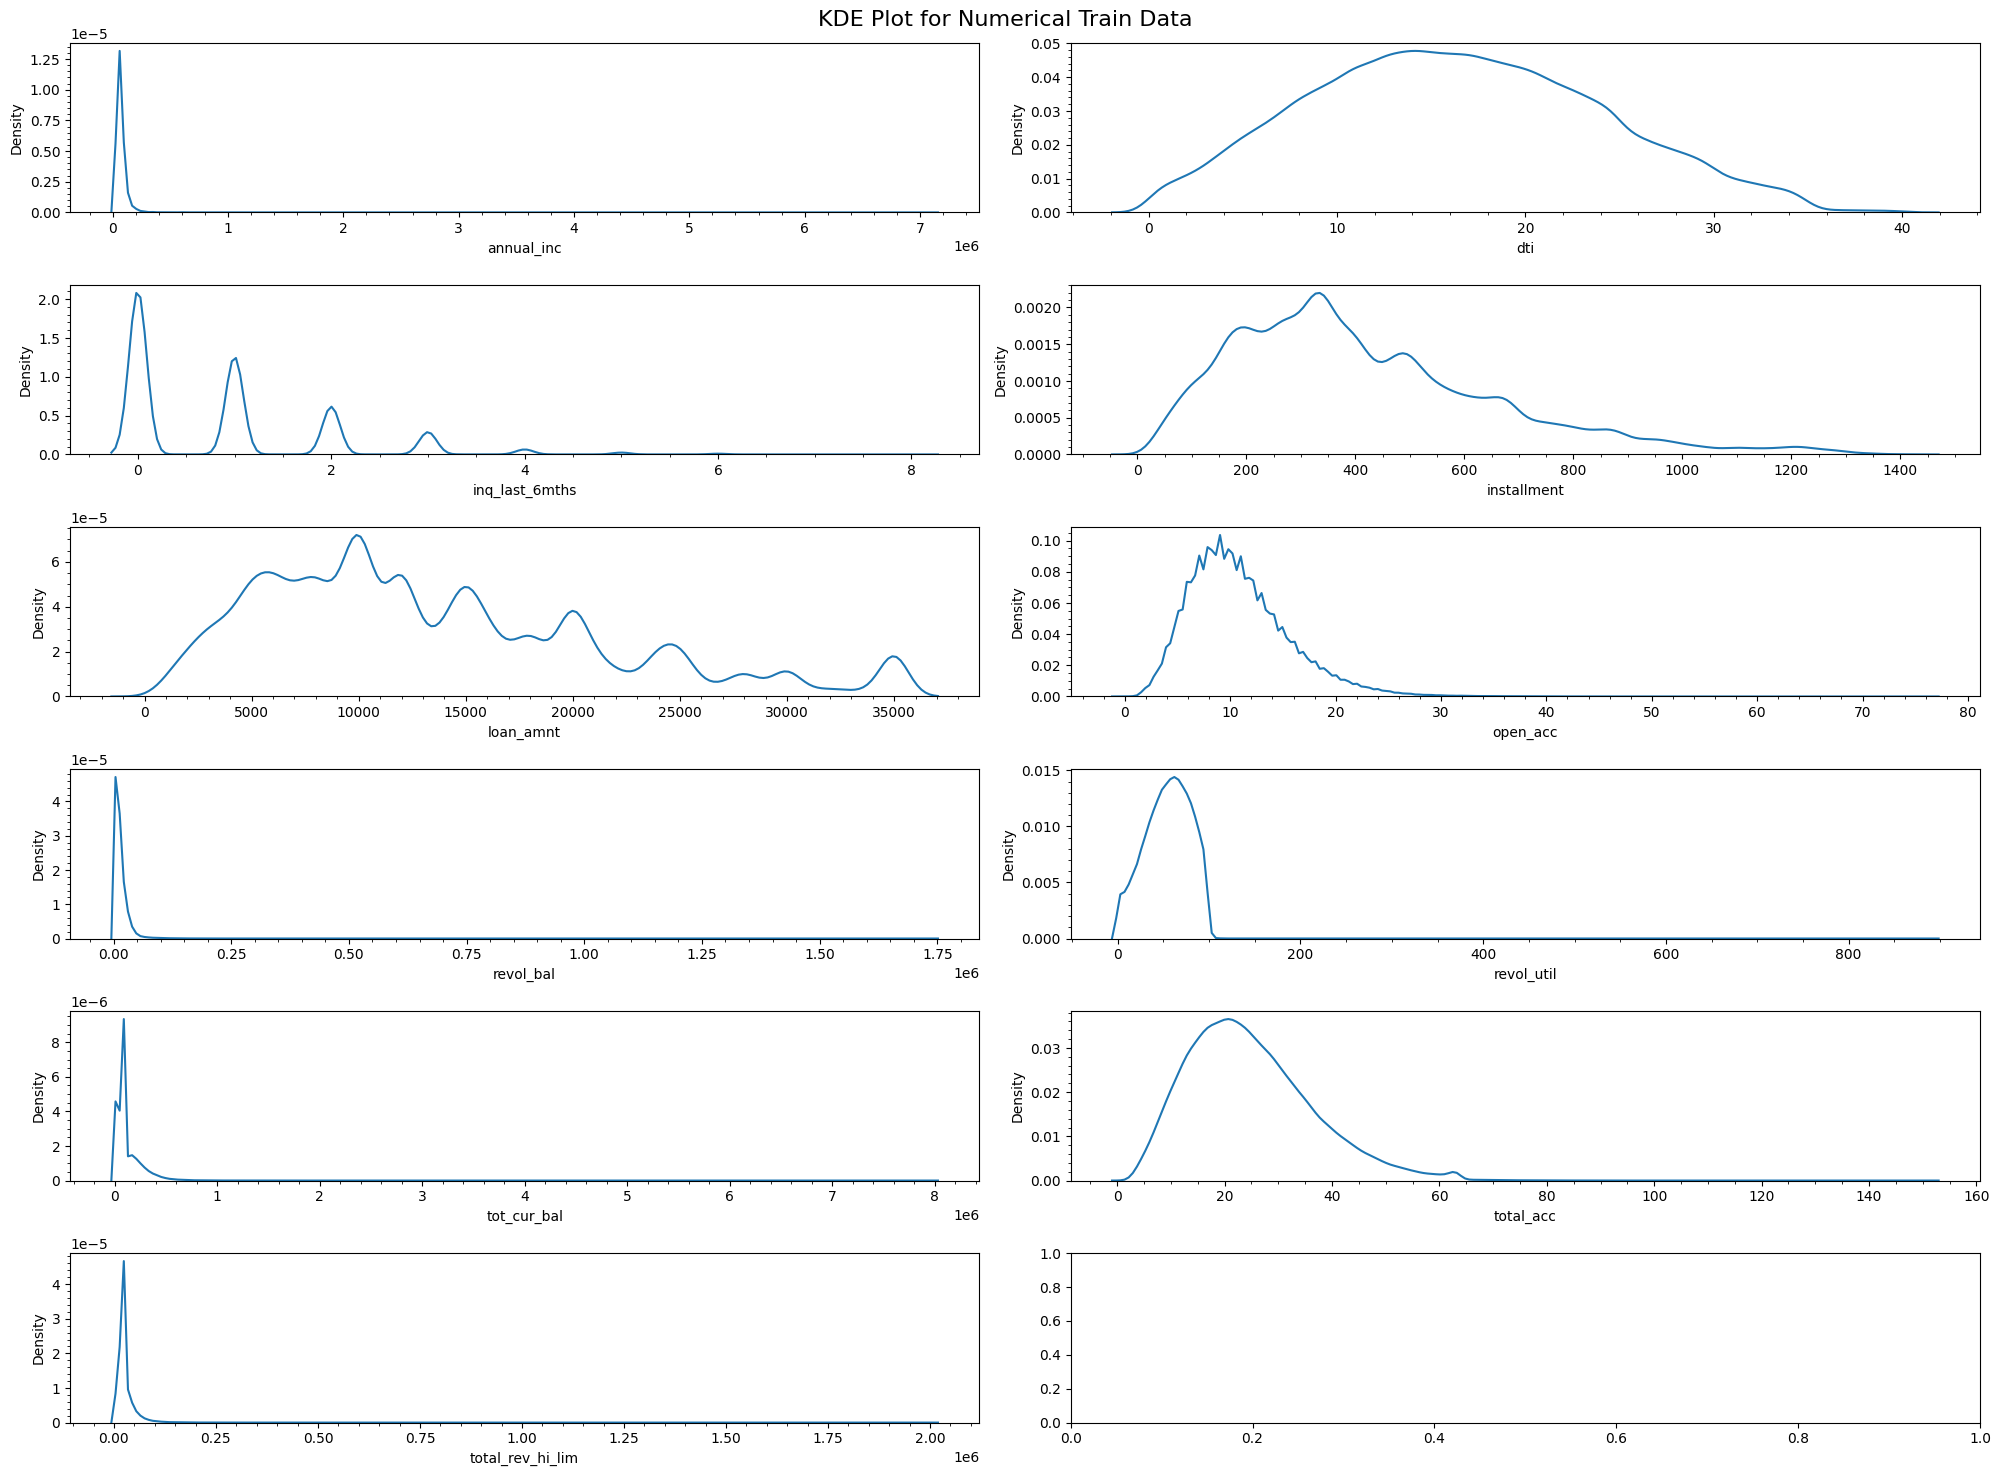

In [51]:
# Review the distribution of the numeric columns in the data using KDEplot of the smoothed data
fig, axes = plt.subplots(6, 2, figsize=(20, 15))
fig.suptitle('KDE Plot for Numerical Train Data', fontsize=16)

i = 0
for y in axes:
    try:
        for ax in y:
            column = num_col[i]
            sns.kdeplot(df_categorized, x=column, ax=ax)
            ax.minorticks_on()
            i += 1
    except IndexError:
            pass
fig.tight_layout(pad=1)
plt.show()

In [52]:
# Calculate the degree of skewness of each numerical data
skew_score = []                          
for i in num_col:
  skew_score.append(round(skew(df_categorized[i]),2))

df_skewness = pd.DataFrame({'Feature':num_col, 'Skewness':skew_score})
df_skewness.sort_values(by='Skewness')

,Feature,Skewness
7,revol_util,-0.09
1,dti,0.19
9,total_acc,0.79
4,loan_amnt,0.84
3,installment,1.01
5,open_acc,1.09
2,inq_last_6mths,1.40
8,tot_cur_bal,4.20
10,total_rev_hi_lim,10.61
6,revol_bal,15.18


From [this](https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/) source, the general rules-of-thumb of skewness are:
- If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

From the skewness score generated above, we have information that:
- `revol_util` and `dti` distribution are approximateley symetric.
- `installment`, `total_acc`, and `loan_amnt` distribution are moderately right skewed.
- the remaining features have highly right skewed distribution.

The features that have moderately skewed and highly skewed distribution have to be transformed in order to get symetric distribution. [This](https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9) source explained various types of transformations of data to better fit for normal distribution.

In [53]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

def boxcox_transform_and_plot(data):
    # Generate Box-Cox transformed data and get lambda value
    transformed_data, fitted_lambda = stats.boxcox(data)
    
    # Create subplots for original and transformed data
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    # Plot original data
    sns.distplot(data, hist=False, kde=True,
                 kde_kws={'shade': True, 'linewidth': 2},
                 label='Original Data', color='green', ax=ax[0])
    
    # Plot transformed data
    sns.distplot(transformed_data, hist=False, kde=True,
                 kde_kws={'shade': True, 'linewidth': 2},
                 label='Transformed Data', color='blue', ax=ax[1])
    
    # Add legends
    ax[0].legend(loc='upper right')
    ax[1].legend(loc='upper right')
    
    # Set plot labels
    ax[0].set_title('Original Data Distribution')
    ax[1].set_title('Box-Cox Transformed Data Distribution')
    
    # Show the plots
    plt.show()
    
    # Return the lambda value used for transformation
    return transformed_data, fitted_lambda

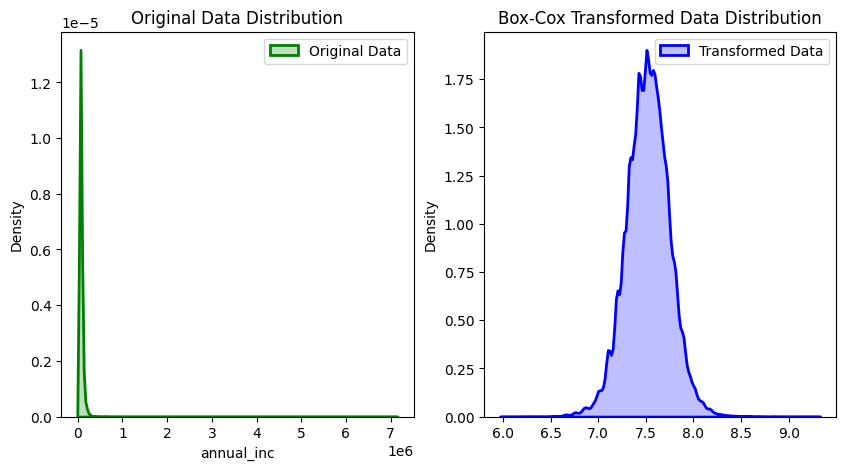

Lambda value used for Transformation of annual_inc: -0.07461538747184049


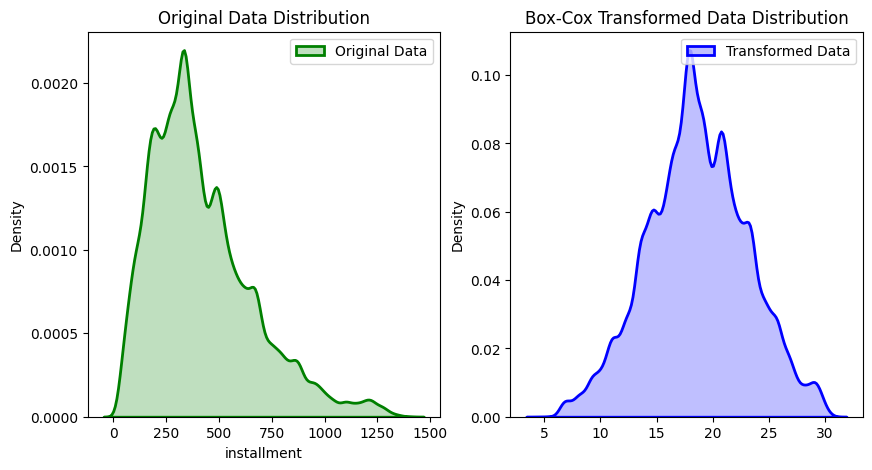

Lambda value used for Transformation of installment: 0.3343629199465037


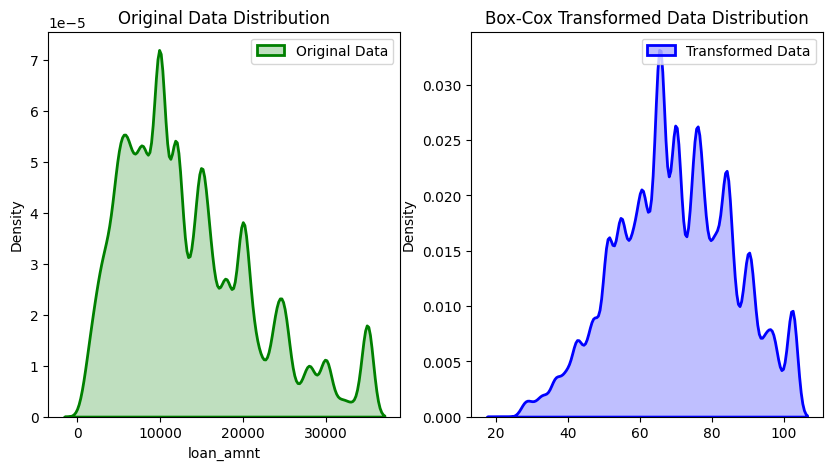

Lambda value used for Transformation of loan_amnt: 0.3427002995228638


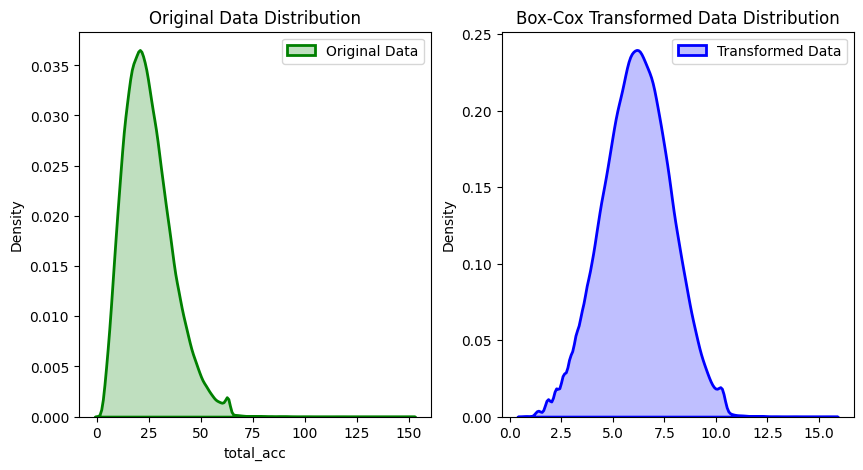

Lambda value used for Transformation of total_acc: 0.38919612247202096


In [54]:
# Transforming skewed with box-cox method

# Defining numerical list of columns except symtric features
num_col = df_categorized.describe().columns.difference(['revol_util', 'dti','loan_status'])

# Copy dataset
df_transformed = df_categorized.copy()

# Create list of transformed columns
transformed_num_cols = []

for col in num_col:
    try:
        original_data = df_categorized[col]
        transformed_data, lambda_value = boxcox_transform_and_plot(original_data)
        
        # Replace the original data with the transformed data
        df_transformed[col] = transformed_data  
        
        # Print lambda value
        print(f"Lambda value used for Transformation of {col}: {lambda_value}")
        
        # Add transformed column to list
        transformed_num_cols.append(col)

    except ValueError:
        pass

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def log_transform_and_plot(data):
    # Apply log transformation to the data
    transformed_data = np.log1p(data)  # Using np.log1p to handle zero and negative values
    
    # Create subplots for original and transformed data
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    # Plot original data
    sns.distplot(data, hist=False, kde=True,
                 kde_kws={'shade': True, 'linewidth': 2},
                 label='Original Data', color='green', ax=ax[0])
    
    # Plot transformed data
    sns.distplot(transformed_data, hist=False, kde=True,
                 kde_kws={'shade': True, 'linewidth': 2},
                 label='Transformed Data', color='blue', ax=ax[1])
    
    # Add legends
    ax[0].legend(loc='upper right')
    ax[1].legend(loc='upper right')
    
    # Set plot labels
    ax[0].set_title('Original Data Distribution')
    ax[1].set_title('Log Transformed Data Distribution')
    
    # Show the plots
    plt.show()
    
    return transformed_data

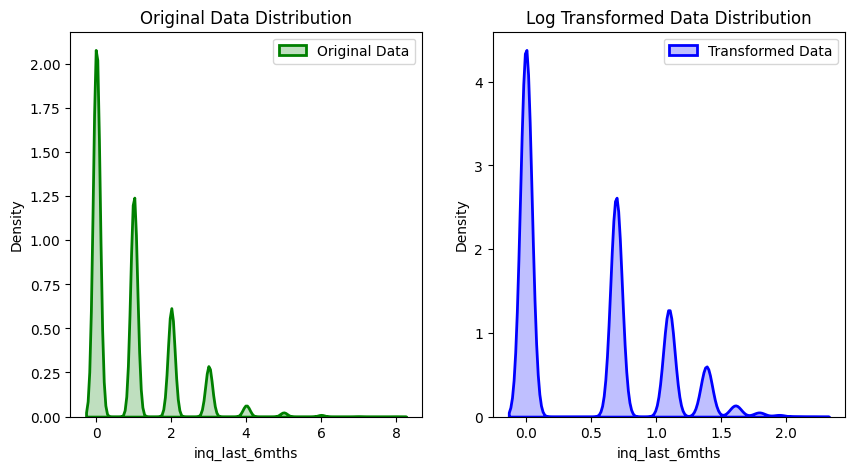

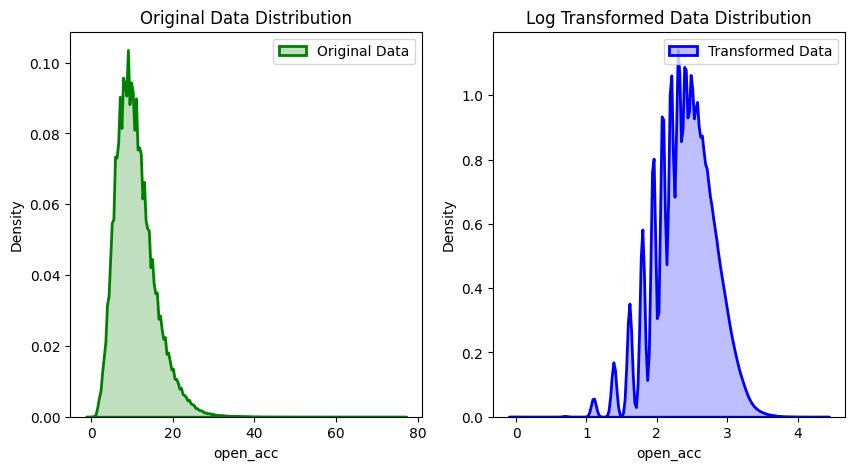

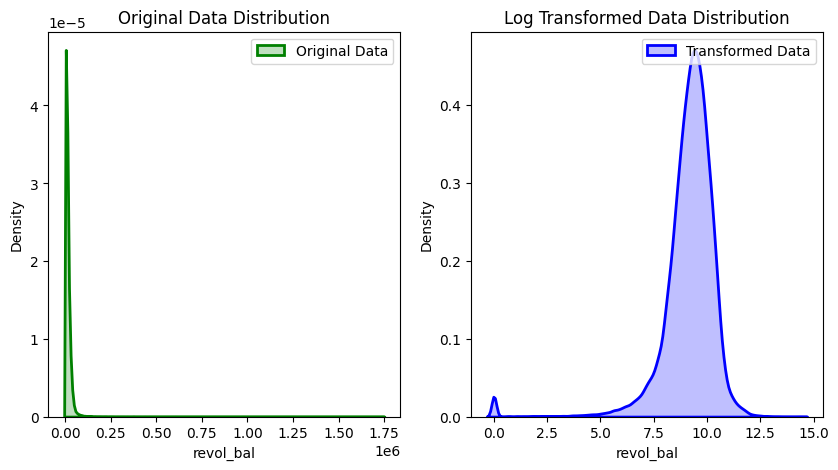

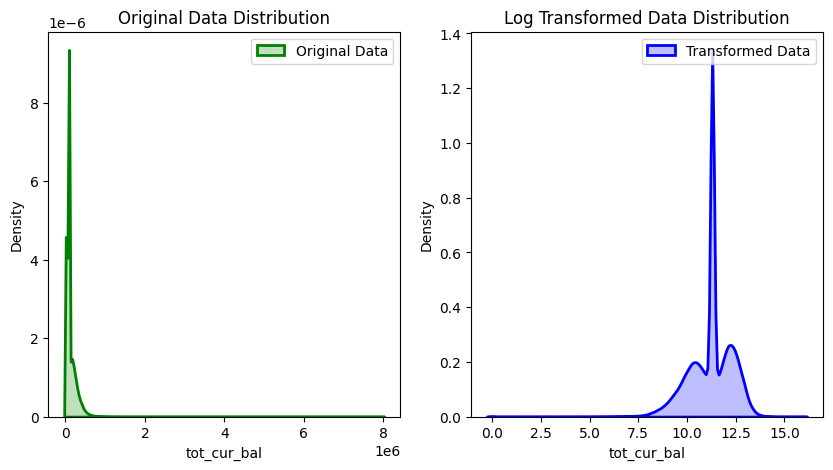

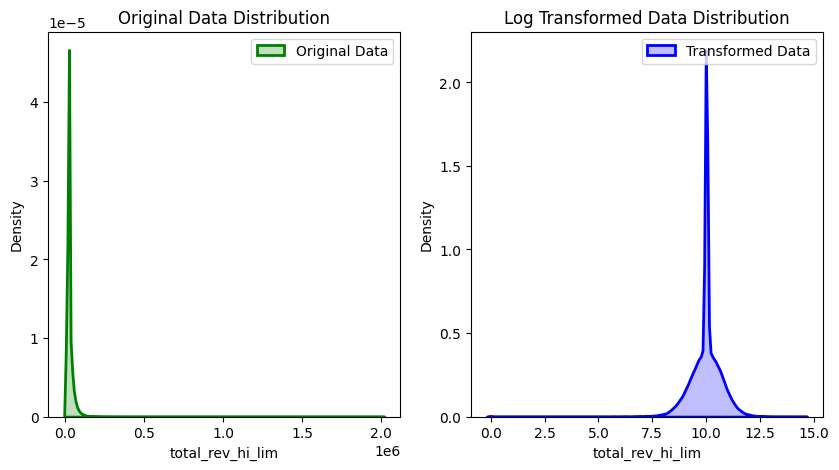

In [56]:
# Deleting column that has transformed from column list
num_col = num_col.difference(transformed_num_cols)

for col in num_col:
    try:
        original_data = df_categorized[col]
        transformed_data = log_transform_and_plot(original_data)
        
        # Replace the original data with the transformed data
        df_transformed[col] = transformed_data  
        
        # Add transformed column to list
        transformed_num_cols.append(col)
    except ValueError:
        continue

In [57]:
# Defining numerical and categorical list of columns
num_col = df_categorized.describe().columns.difference(['loan_status'])

# Calculate the degree of skewness before and after transformation for each numerical data
skew_score = []  
transformed_skew_score = []                     

for i in num_col:
  skew_score.append(round(skew(df_categorized[i]),2))
  transformed_skew_score.append(round(skew(df_transformed[i]),2))
df_skewness = pd.DataFrame({'Feature':num_col, 'Skewness':skew_score, 'Transformed Skewness':transformed_skew_score})
df_skewness.sort_values(by='Transformed Skewness')

,Feature,Skewness,Transformed Skewness
6,revol_bal,15.18,-3.13
10,total_rev_hi_lim,10.61,-1.26
8,tot_cur_bal,4.20,-0.82
5,open_acc,1.09,-0.23
7,revol_util,-0.09,-0.09
4,loan_amnt,0.84,-0.03
0,annual_inc,31.99,-0.01
3,installment,1.01,-0.01
9,total_acc,0.79,-0.01
1,dti,0.19,0.19


After conducting transformation with 


In [58]:
still_skewed_col = [
                    'inq_last_6mths',
                    'tot_cur_bal',
                    'total_rev_hi_lim',
                    'revol_bal'
                    ]

In [59]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

def yeojohnson_transform_and_plot(data):
    # Generate Yeo-Johnson transformed data and get optimal lambdas
    transformed_data, fitted_lambda = stats.yeojohnson(data)
    
    # Create subplots for original and transformed data
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    # Plot original data
    sns.distplot(data, hist=False, kde=True,
                 kde_kws={'shade': True, 'linewidth': 2},
                 label='Original Data', color='green', ax=ax[0])
    
    # Plot transformed data
    sns.distplot(transformed_data, hist=False, kde=True,
                 kde_kws={'shade': True, 'linewidth': 2},
                 label='Transformed Data', color='blue', ax=ax[1])
    
    # Add legends
    ax[0].legend(loc='upper right')
    ax[1].legend(loc='upper right')
    
    # Set plot labels
    ax[0].set_title('Original Data Distribution')
    ax[1].set_title('Yeo-Johnson Transformed Data Distribution')
    
    # Show the plots
    plt.show()
    
    # Return the fitted lambdas
    return transformed_data, fitted_lambda



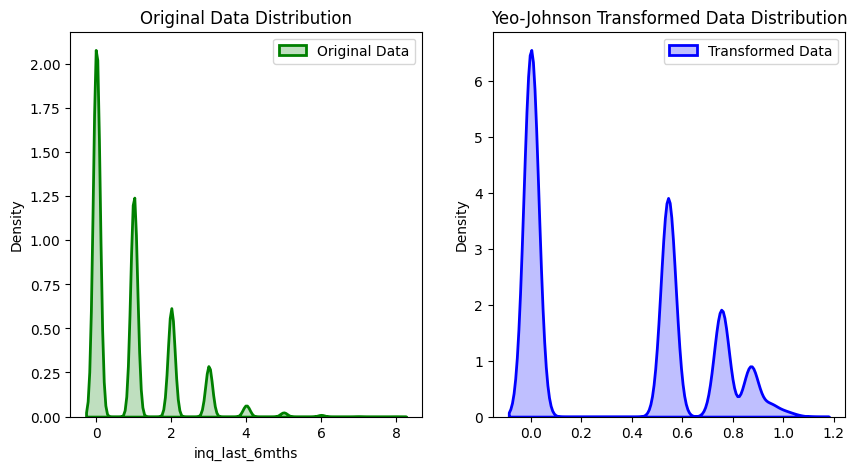

Lambda value used for Transformation of inq_last_6mths: -0.7306436087702602


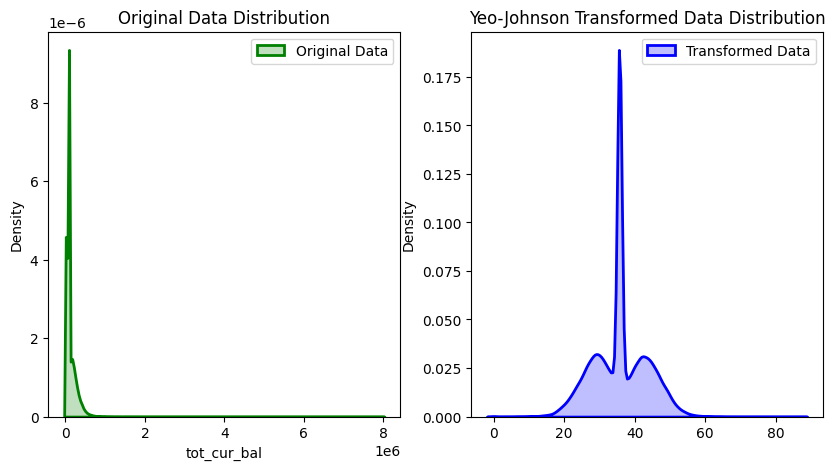

Lambda value used for Transformation of tot_cur_bal: 0.17551927197520106


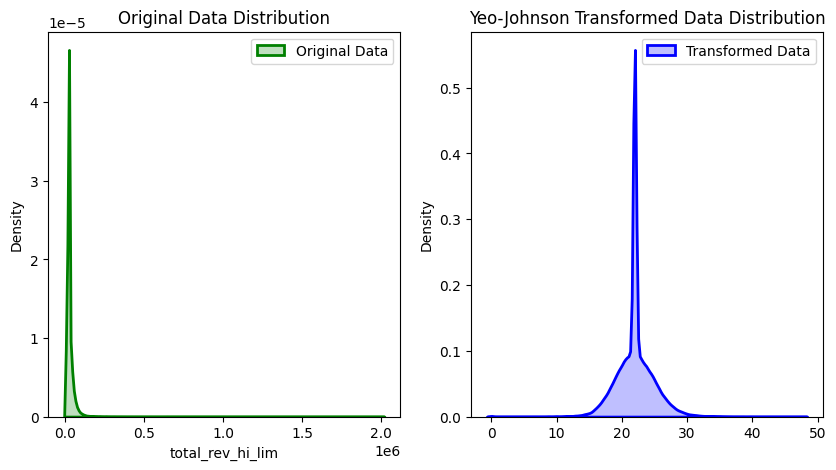

Lambda value used for Transformation of total_rev_hi_lim: 0.14075931861760008


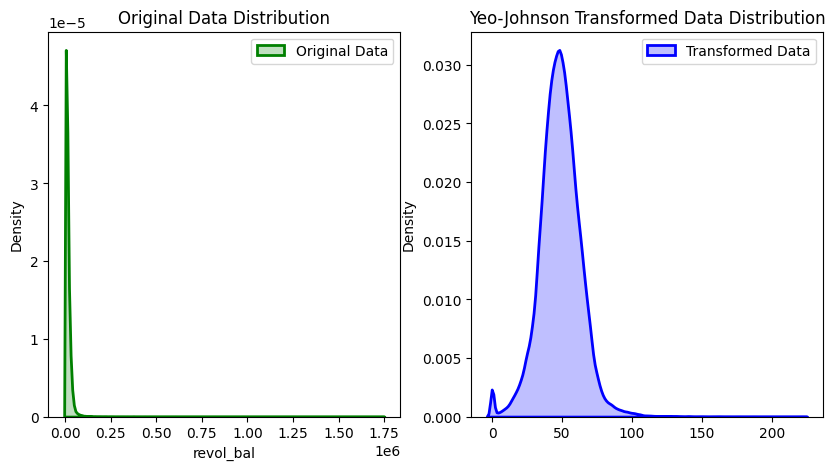

Lambda value used for Transformation of revol_bal: 0.29083745037349934


In [60]:
# Transforming skewed with yeojohnson method

# Create list of transformed columns
transformed_num_cols = []

for col in still_skewed_col:
    try:
        original_data = df_categorized[col]
        transformed_data, lambda_value = yeojohnson_transform_and_plot(original_data)
        
        # Replace the original data with the transformed data
        df_transformed[col] = transformed_data  
        
        # Print lambda value
        print(f"Lambda value used for Transformation of {col}: {lambda_value}")
        
        # Add transformed column to list
        transformed_num_cols.append(col)

    except ValueError:
        pass

In [61]:
# Defining numerical and categorical list of columns
num_col = df_categorized.describe().columns.difference(['loan_status'])

# Calculate the degree of skewness before and after transformation for each numerical data
skew_score = []  
transformed_skew_score = []                     

for i in num_col:
  skew_score.append(round(skew(df_categorized[i]),2))
  transformed_skew_score.append(round(skew(df_transformed[i]),2))
df_skewness = pd.DataFrame({'Feature':num_col, 'Skewness':skew_score, 'Transformed Skewness':transformed_skew_score})
df_skewness.sort_values(by='Transformed Skewness')

,Feature,Skewness,Transformed Skewness
5,open_acc,1.09,-0.23
7,revol_util,-0.09,-0.09
4,loan_amnt,0.84,-0.03
0,annual_inc,31.99,-0.01
3,installment,1.01,-0.01
9,total_acc,0.79,-0.01
8,tot_cur_bal,4.20,0.01
10,total_rev_hi_lim,10.61,0.13
1,dti,0.19,0.19
6,revol_bal,15.18,0.19


All features' |skewness scores| are now less than 0.5, thus the distribution can be approximately symmetric and considered a normal distribution.

In [62]:
df_transformed.shape

(227214, 24)

In [63]:
# # List of numerical columns that will be feature engineered using categorization/binning
# num_cols_categorize = [
#                     'acc_now_delinq',
#                     'collections_12_mths_ex_med',
#                     'tot_coll_amt',
#                     'pub_rec',
#                     'delinq_2yrs'
#                     ]

# Defining numerical and categorical list of columns
num_col = df_categorized.describe().columns.difference(['loan_status'])
cat_col = df_categorized.describe(exclude='number').columns

In [64]:
num_col.shape

(11,)

In [65]:
cat_col.shape

(12,)

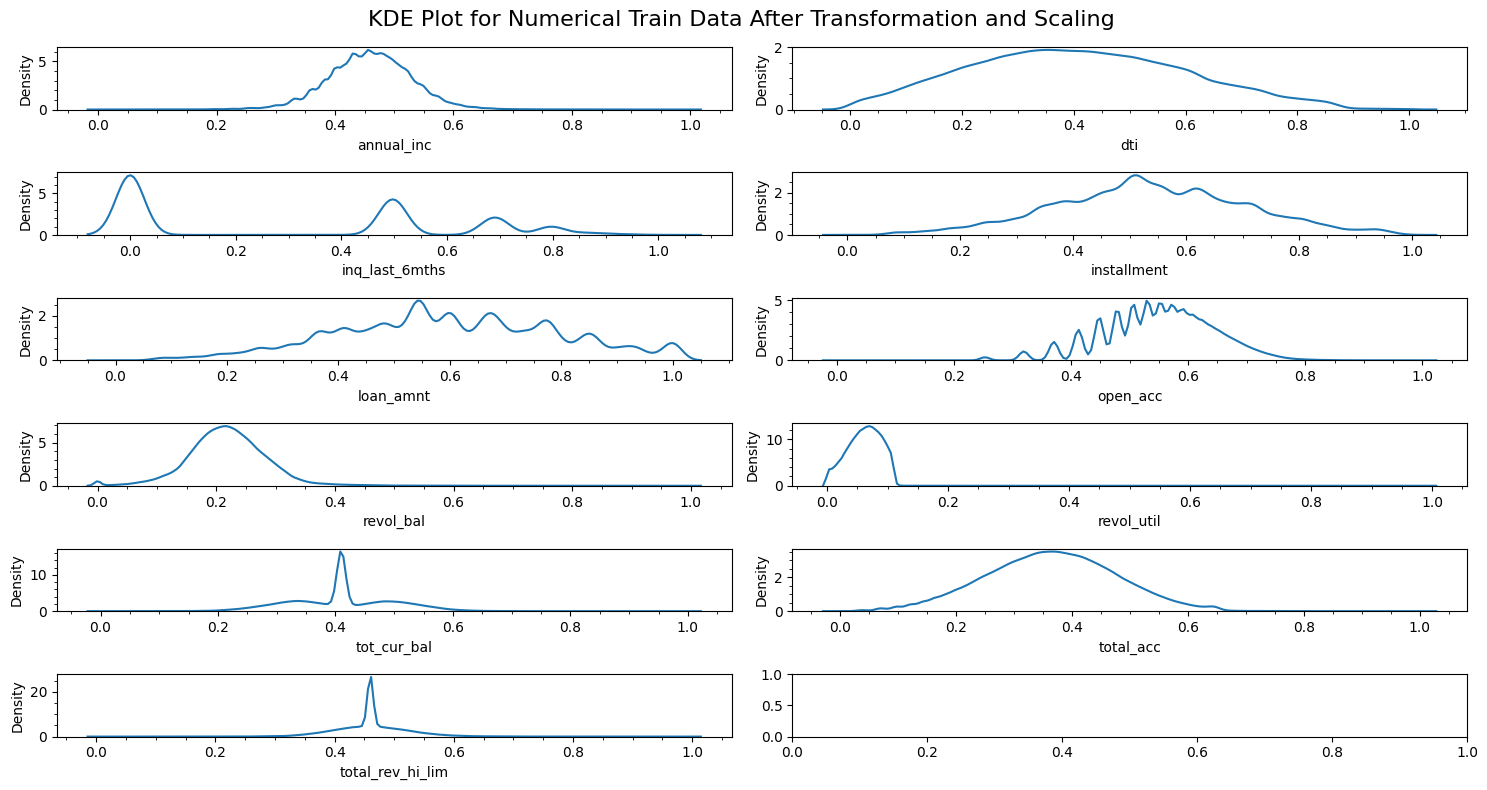

In [104]:
df_transformed[num_col] = MinMaxScaler().fit_transform(df_transformed[num_col].values.reshape(df_categorized[num_col].shape))

# KDE Plot for Numerical Train Data After Transformation
fig, axes = plt.subplots(6, 2, figsize=(15, 8))

i = 0
for y in axes:
    try:
        for ax in y:
            column = num_col[i]
            sns.kdeplot(df_transformed, x=column, ax=ax)
            ax.minorticks_on()
            i += 1
    except IndexError:
            pass

fig.suptitle('KDE Plot for Numerical Train Data After Transformation and Scaling', fontsize=16)
fig.tight_layout(pad=1)
plt.show()

In [105]:
# Checking numeric features stats
df_transformed[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
annual_inc,227214.0,0.459119,0.069926,0.0,0.415638,0.459496,0.503207,1.0
dti,227214.0,0.409217,0.191789,0.0,0.266567,0.401350,0.544886,1.0
inq_last_6mths,227214.0,0.312843,0.316296,0.0,0.000000,0.497211,0.497211,1.0
installment,227214.0,0.536659,0.168902,0.0,0.424875,0.532869,0.650395,1.0
loan_amnt,227214.0,0.596159,0.197202,0.0,0.454427,0.599543,0.734246,1.0
open_acc,227214.0,0.550413,0.093402,0.0,0.478714,0.552026,0.607545,1.0
revol_bal,227214.0,0.218136,0.065895,0.0,0.178810,0.217074,0.257342,1.0
revol_util,227214.0,0.061462,0.027663,0.0,0.041578,0.063320,0.083268,1.0
tot_cur_bal,227214.0,0.411378,0.086573,0.0,0.354733,0.409811,0.469583,1.0
total_acc,227214.0,0.364889,0.112326,0.0,0.285376,0.363403,0.444649,1.0


Based on examination of the plot and descriptive statistics, it can be seen that trasformation and standardization have been successfully carried out, where the final data distribution for each feature is in the range 0 to 1.

The same transformation will be carried out on the test data as well so that the model formed can be applied to the test data as well.

#### 2.5 Feature Encoding

There are several categorical features whose data type is in the form of an object, so before entering them into the model, it is necessary to encode them into one or more columns in numerical form for these features so that the model can be more easily formed.

In [120]:
# Create copy before encoding
df_encoded = df_transformed.copy()

Below we conduct Label Encoding to features that have ordinal values. The ordinal categories represent a clear and meaningful order or hierarchy based on creditworthiness and commitment to financial obligations.

In [121]:
# Encoding 'grade' feature
grade_dict = {'B': 2, 'C': 3, 'D': 4, 'A': 1, 'E': 5, 'F': 6, 'G': 7}

# convert grade value to integer A to 1 until G to 7
df_encoded['grade'] = df_encoded['grade'].map(grade_dict)

In [122]:
# Encoding 'emp_length' feature
emp_length_dict = {
                '2 years': 0,
                '10+ years': 1,
                '9 years': 2,
                '8 years': 3,
                '6 years': 4,
                '< 1 year': 5,
                '1 year': 6,
                '7 years': 7,
                '5 years': 8,
                '3 years': 9,
                '4 years': 10
                }
df_encoded['emp_length'] = df_encoded['emp_length'].map(emp_length_dict)

In [123]:
# Encoding 'delinq_2yrs' feature
delinq_2yrs_dict = {
                    'No Delinquencies':2, 
                    'Low Delinquencies':1, 
                    'High Delinquencies':0
                    }
df_encoded['delinq_2yrs'] = df_encoded['delinq_2yrs'].map(delinq_2yrs_dict)

In [124]:
# Encoding 'pub_rec' feature
pub_rec_dict = {
                'No Bankruptcy': 1, 
                'Bankruptcy Occurred': 0
                }
df_encoded['pub_rec'] = df_encoded['pub_rec'].map(pub_rec_dict)

In [125]:
# Encoding 'collections_12_mths_ex_med' feature
collections_12_mths_ex_med_dict = {
                                    'No Collections': 1, 
                                    'Collections Occurred': 0
                                    }
df_encoded['collections_12_mths_ex_med'] = df_encoded['collections_12_mths_ex_med'].map(collections_12_mths_ex_med_dict)

In [126]:
# Encoding 'acc_now_delinq' feature
acc_now_delinq_dict = {
                        'No Delinquency': 2,
                        'Low Delinquency': 1,
                        'High Delinquency': 0
                        }
df_encoded['acc_now_delinq'] = df_encoded['acc_now_delinq'].map(acc_now_delinq_dict)

In [127]:
# Encoding 'tot_coll_amt' feature
tot_coll_amt_dict = {
                    'No Collections': 3,
                    'Low Collections': 2,
                    'Moderate Collections': 1,
                    'High Collections': 0
                    }
df_encoded['tot_coll_amt'] = df_encoded['tot_coll_amt'].map(tot_coll_amt_dict)

In [128]:
# Encoding 'home_ownership' feature
home_ownership_dict = {
                        'OWN': 3,
                        'MORTGAGE': 2,
                        'RENT': 1,
                        'OTHER': 0,
                        'NONE': 0,
                        'ANY':0
                        }
df_encoded['home_ownership'] = df_encoded['home_ownership'].map(home_ownership_dict)

In [129]:
# Encoding 'verification_status' feature
verification_status_dict = {
                            'Not Verified': 0,
                            'Verified': 1,
                            'Source Verified': 2
                            }
df_encoded['verification_status'] = df_encoded['verification_status'].map(verification_status_dict)

Below we conduct feature encoding with One Hot Encoding Method. This method is used to encode categorical features that considered nominal values.

In [130]:
# Create list of OHE features 
ohe_list = ['purpose', 'initial_list_status', 'term']

# Create OHE from list of features
dummy_df = pd.get_dummies(df_encoded[ohe_list])

# Concatinate OHE to dataframe
df_encoded = pd.concat([df_encoded, dummy_df], axis=1)

# Dropping initial features
df_encoded = df_encoded.drop(ohe_list, axis=1)

In [131]:
# Checking encoded dataframe info
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227214 entries, 0 to 466283
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   227214 non-null  float64
 1   installment                 227214 non-null  float64
 2   grade                       227214 non-null  int64  
 3   emp_length                  227214 non-null  int64  
 4   home_ownership              227214 non-null  int64  
 5   annual_inc                  227214 non-null  float64
 6   verification_status         227214 non-null  int64  
 7   loan_status                 227214 non-null  int64  
 8   dti                         227214 non-null  float64
 9   delinq_2yrs                 227214 non-null  int64  
 10  inq_last_6mths              227214 non-null  float64
 11  open_acc                    227214 non-null  float64
 12  pub_rec                     227214 non-null  int64  
 13  revol_bal     

In [132]:
df_encoded.describe()

,loan_amnt,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,term_ 36 months,term_ 60 months
count,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.00000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000
mean,0.596159,0.536659,2.765560,3.963972,1.660131,0.459119,0.930532,0.186938,0.409217,1.824047,0.312843,0.550413,0.88568,0.218136,0.061462,0.364889,0.994657,1.997377,2.901291,0.411378,0.461206,0.014924,0.200467,0.582165,0.001430,0.058104,0.006377,0.025175,0.011342,0.007909,0.056484,0.001105,0.019744,0.006175,0.008600,0.747916,0.252084,0.785849,0.214151
std,0.197202,0.168902,1.327414,3.333656,0.627629,0.069926,0.788745,0.389863,0.191789,0.425643,0.316296,0.093402,0.31820,0.065895,0.027663,0.112326,0.072900,0.051663,0.362542,0.086573,0.057224,0.121250,0.400351,0.493204,0.037793,0.233940,0.079603,0.156655,0.105892,0.088580,0.230855,0.033219,0.139118,0.078337,0.092336,0.434210,0.434210,0.410233,0.410233
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.454427,0.424875,2.000000,1.000000,1.000000,0.415638,0.000000,0.000000,0.266567,2.000000,0.000000,0.478714,1.00000,0.178810,0.041578,0.285376,1.000000,2.000000,3.000000,0.354733,0.434850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.599543,0.532869,3.000000,3.000000,2.000000,0.459496,1.000000,0.000000,0.401350,2.000000,0.497211,0.552026,1.00000,0.217074,0.063320,0.363403,1.000000,2.000000,3.000000,0.409811,0.459882,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.734246,0.650395,4.000000,7.000000,2.000000,0.503207,2.000000,0.000000,0.544886,2.000000,0.497211,0.607545,1.00000,0.257342,0.083268,0.444649,1.000000,2.000000,3.000000,0.469583,0.485141,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,10.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Machine Learning Modelling & Evaluation

#### 3.1 Data Train-Test Split

The data is divided into train and test data, before being processed further. The model will be created using train data, and it will be tested using test data.

In [137]:
# Splitting data into features & target
y = df_encoded['loan_status']
X = df_encoded.drop(labels='loan_status', axis=1, inplace=False)

print(X.shape)
print(y.shape)

(227214, 38)
(227214,)


In [138]:
# Splittig train and test with 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

# Check amount of data on train and test
print('Train Data Shape =', x_train.shape[0])
print('Test Data Shape =', x_test.shape[0])

# Check if split is balanced based on target value
print('mean value of y on train =', y_train.mean())
print('mean value of y on test =', y_test.mean())

Train Data Shape = 181771
Test Data Shape = 45443
mean value of y on train = 0.18693851054348604
mean value of y on test = 0.1869374821204586


#### 3.2 Feature Selection

##### 3.2.1 Correlation Heat Map

In [139]:
# copy encoded dataframe and add y_train back for feature heatmap
df_heatmap = df_encoded.copy()
df_heatmap.sample()

,loan_amnt,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,term_ 36 months,term_ 60 months
26390,0.734246,0.479509,6,1,2,0.522994,2,0,0.427607,1,0.497211,0.607545,1,0.235782,0.059733,0.410535,1,2,3,0.409811,0.459882,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


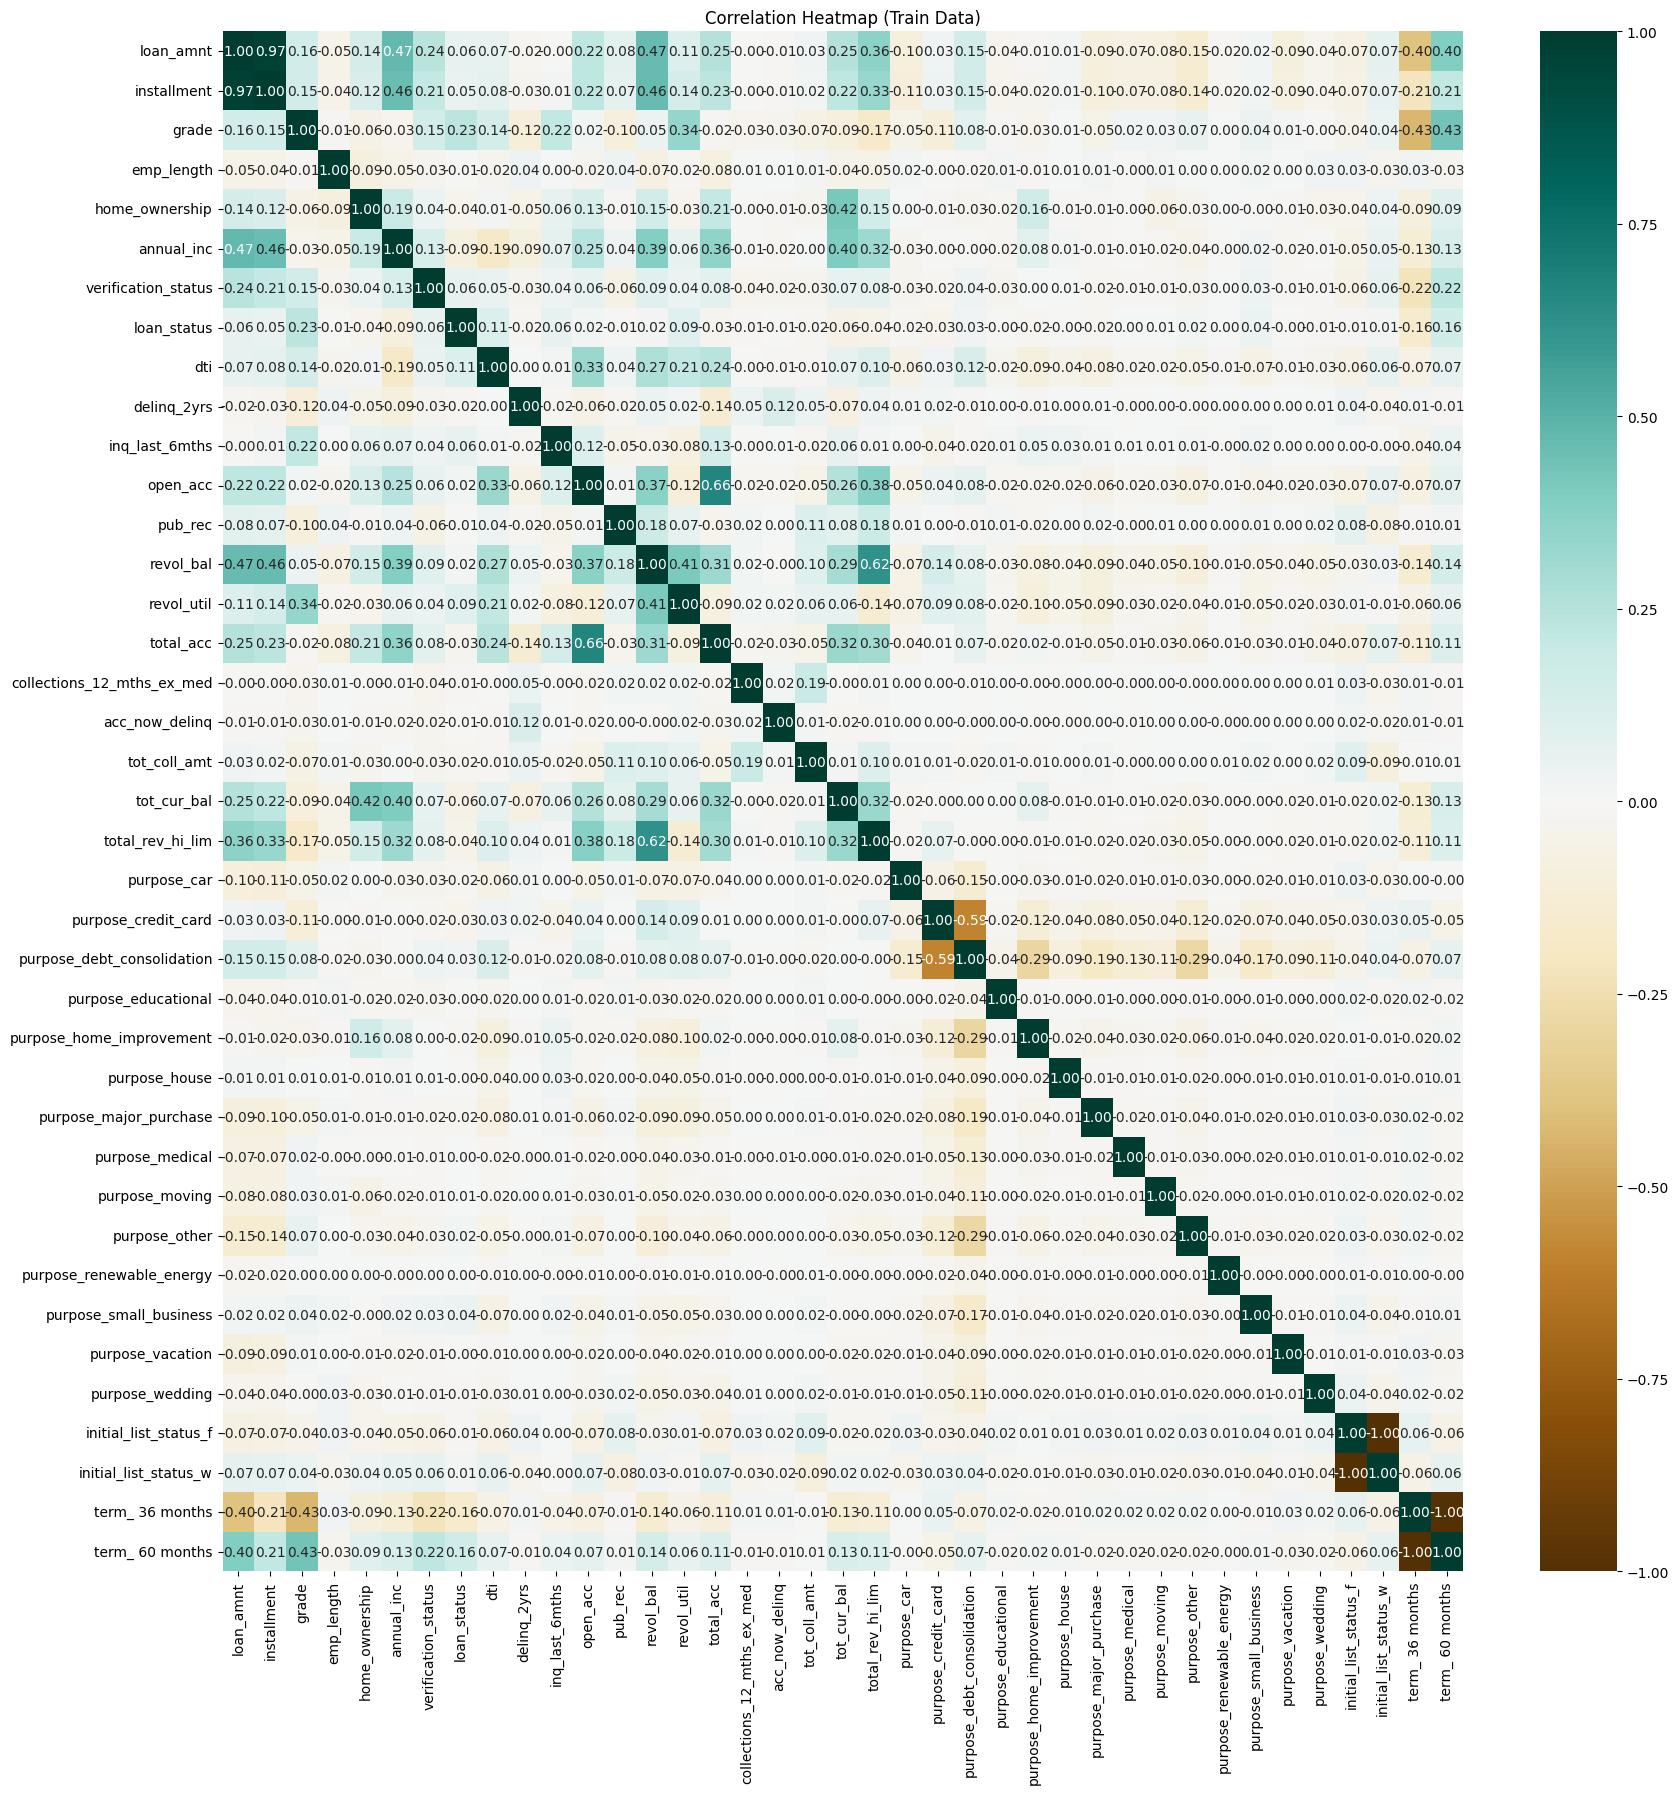

In [140]:
# Correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df_heatmap.corr(method='spearman', numeric_only=True), cmap='BrBG', annot=True, vmin=-1, vmax=1, fmt='.2f')

plt.title('Correlation Heatmap (Train Data)')
plt.show()

From the correlatio heatmap above, we can conclude that:
- `installment` and `loan_amnt` have 0.97 correlation score, therefore we're about to drop the `installment` feature because it less correlated with the target. 
- `term_36 months` and `term_60 months` are perfectly correlated to each other. but because they are One Hot Encoded, we decided not to drop it and letting anoother feature selection analyze first.

In [191]:
x_train.shape

(181771, 38)

In [196]:
x_test.shape

(45443, 38)

In [197]:
# Dropping `installlment` feature on train and test data
x_train = x_train.drop(labels='installment', axis=1, inplace=False)
x_test = x_test.drop(labels='installment', axis=1, inplace=False)

In [200]:
# Re checking train and test data shape
print(x_train.shape)
print(x_test.shape)

(181771, 37)
(45443, 37)


##### 3.2.2 ANOVA

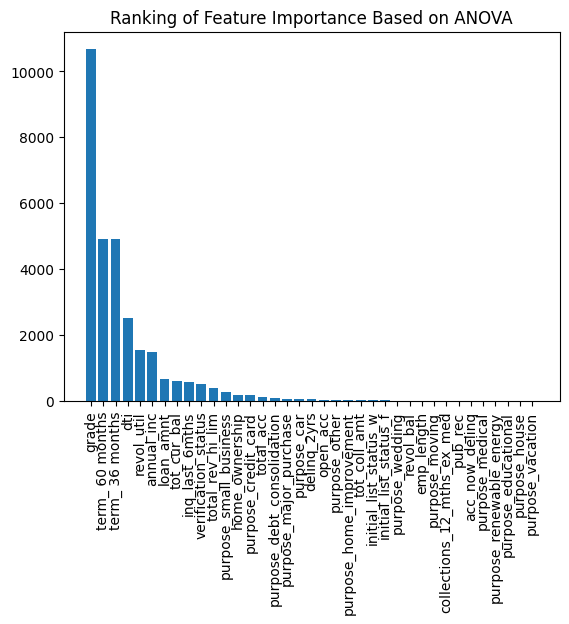

In [201]:
# using ANOVA
selector = SelectKBest(f_classif, k='all')
kbest_fit = selector.fit_transform(x_train, y_train)

columns = x_train.columns

feature_scores = list(zip(selector.scores_,columns))
sorted_feature_scores = sorted(feature_scores,reverse=True)

num_list = []
col_list = []
for i in range(len(columns)):
   num_list.append((sorted_feature_scores[i])[0])
   col_list.append((sorted_feature_scores[i])[1])

plt.bar(col_list,num_list)
plt.xticks(rotation=90)
plt.title('Ranking of Feature Importance Based on ANOVA')

plt.show()

In [203]:
pd.DataFrame({'feature': col_list, 'importance': num_list})

,feature,importance
0,grade,10669.29
1,term_ 60 months,4936.86
2,term_ 36 months,4936.86
3,dti,2536.05
4,revol_util,1563.16
5,annual_inc,1487.99
6,loan_amnt,669.75
7,tot_cur_bal,622.30
8,inq_last_6mths,596.85
9,verification_status,541.93


##### 3.2.3 Recursive Feature Elimination (RFE)

In [187]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # You can use any classifier of your choice
import numpy as np

def perform_rfe(X, y, num_features_to_select, model):
    """
    Perform Recursive Feature Elimination (RFE) to select a specified number of features.

    Parameters:
    - X: Feature matrix (numpy array or DataFrame)
    - y: Target vector (numpy array or Series)
    - num_features_to_select: Number of features to select
    - model: The estimator used for RFE (e.g., a classifier or regressor)

    Returns:
    - selected_features: List of selected feature indices
    """

    # Initialize RFE without specifying the estimator
    rfe = RFE(estimator=None, n_features_to_select=num_features_to_select)

    # Set the estimator (model) for RFE
    rfe.estimator = model

    # Fit RFE to the data
    rfe.fit(X, y)

    # Get the indices of selected features
    selected_features = np.where(rfe.support_)[0]

    return selected_features

# Example usage:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# clf = RandomForestClassifier()  # You can use any classifier of your choice
# selected_features = perform_rfe(X_train, y_train, num_features_to_select=20, model=clf)
# print("Selected feature indices:", selected_features)


In [202]:
# RFE with num_features_to_select = 20
clf = RandomForestClassifier()  # You can use any classifier of your choice
selected_features = perform_rfe(x_train, y_train, num_features_to_select=20, model=clf)

# Get the names of the selected features
selected_feature_names = x_train.columns[selected_features].tolist()
print("Selected feature names:", selected_feature_names)


Selected feature indices: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 16 17 18 21 34 35 36]


In [204]:
# Get the names of the selected features
selected_feature_names = x_train.columns[selected_features].tolist()
print("Selected feature names:", selected_feature_names)


Selected feature names: ['loan_amnt', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'purpose_debt_consolidation', 'initial_list_status_w', 'term_ 36 months', 'term_ 60 months']


In [207]:
top_20 = [
            'loan_amnt', 'grade', 'emp_length', 
            'home_ownership', 'annual_inc', 
            'verification_status', 'dti', 
            'delinq_2yrs', 'inq_last_6mths', 
            'open_acc', 'revol_bal', 'revol_util', 
            'total_acc', 'tot_coll_amt', 'tot_cur_bal', 
            'total_rev_hi_lim', 'purpose_debt_consolidation', 
            'initial_list_status_w', 'term_ 36 months', 
            'term_ 60 months'
            ]

In [210]:
# Define columns about to drop
top_20_diff = x_train.columns.difference(top_20)

# Dropping features
x_train_20 = x_train.drop(labels= top_20_diff, axis=1, inplace=False)
x_test_20 = x_test.drop(labels= top_20_diff, axis=1, inplace=False)

# Re checking train and test shape
print(x_train_20.shape)
print(x_test_20.shape)
# num_col = df_categorized.describe().columns.difference(['loan_status'])

(181771, 20)
(45443, 20)


#### 3.3 Handle Imbalance Class

The distribution of the fully paid loan ratio in train data and test data is similar because stratification has been carried out based on targets at the data separation stage, and removing outliers does not have a significant impact on this ratio because the number of outliers is not too significant and is also estimated to be evenly distributed. A ratio that is close to 80:20 is considered imbalance so action needs to be taken to balance the ratio.

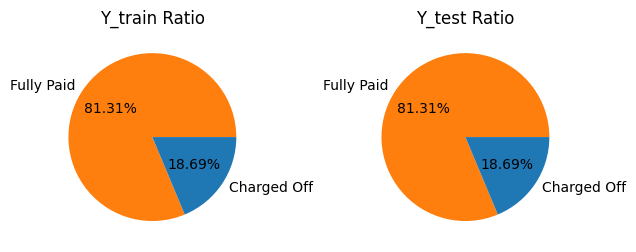

In [142]:
# check ratio on Fully Paid vs Charged Off Loans 
plt.subplot(1, 2, 1)
plt.title('Y_train Ratio')
y_train.value_counts().plot.pie(labels=['Fully Paid', 'Charged Off'], colors=['tab:orange', 'tab:blue'], autopct='%.2f%%')
plt.ylabel('')

plt.subplot(1, 2, 2)
plt.title('Y_test Ratio')
y_test.value_counts().plot.pie(labels=['Fully Paid', 'Charged Off'], colors=['tab:orange', 'tab:blue'], autopct='%.2f%%')
plt.ylabel('')

# Add a title to the whole plot
fig.suptitle('Ratio of Fully Paid and Charged Off Loans for Train and Test Data', fontsize=16, fontweight='bold', y=1.1)

plt.tight_layout(pad=1)
plt.show()

On this occasion, we will use an oversampling method, namely the Synthetic Minority Over-sampling Technique (SMOTE). This is because keeping as much information as possible from the majority group is important, as we don't want to overlook potentially creditworthy applicants. Oversampling can help address the problem of class imbalance while preserving the wealth of the majority class.

In [143]:
# Checking value count of each loan status and percentage of data
status, count = y_train.value_counts().index, y_train.value_counts().values
percent = y_train.value_counts().values/y_train.shape[0]*100
pd.DataFrame({'Loan Status': status,'Count': count, 'Percentage':percent})[['Loan Status','Count', 'Percentage']]

,Loan Status,Count,Percentage
0,0,147791,81.306149
1,1,33980,18.693851


When we evaluate a trained model, it is important to use original, unmodified test data. This allows us to assess how well the model performs on imbalanced real-world data. Meanwhile, using the same handling imbalance data technique on test data can lead to unrealistic or overly optimistic evaluation results. So we will only handle imbalance on training data.

Here we're using one of oversampling technique SMOTE, where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [256]:
# Checking value count of each loan status and percentage of data
status, count =y_test.value_counts().index,y_test.value_counts().values
percent =y_test.value_counts().values/y_test.shape[0]*100
pd.DataFrame({'Loan Status': status,'Count': count, 'Percentage':percent})[['Loan Status','Count', 'Percentage']]

,Loan Status,Count,Percentage
0,0,36948,81.31
1,1,8495,18.69


In [211]:
# Handle Imbalance Class on Training Data Top 20
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
x_train_20_res, y_train_20_res = sm.fit_resample(x_train_20, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_20_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_20_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_20_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_20_res == 0)))

After OverSampling, the shape of train_X: (295582, 20)
After OverSampling, the shape of train_y: (295582,) 

After OverSampling, counts of label '1': 147791
After OverSampling, counts of label '0': 147791


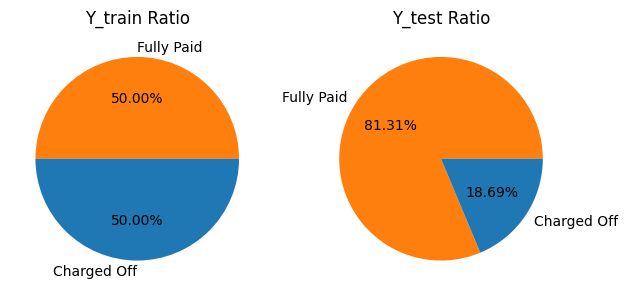

In [255]:
# check ratio on Fully Paid vs Charged Off Loans After Oversampling
plt.subplot(1, 2, 1)
plt.title('Y_train Ratio')
y_train_20_res.value_counts().plot.pie(labels=['Fully Paid', 'Charged Off'], colors=['tab:orange', 'tab:blue'], autopct='%.2f%%')
plt.ylabel('')

plt.subplot(1, 2, 2)
plt.title('Y_test Ratio')
y_test.value_counts().plot.pie(labels=['Fully Paid', 'Charged Off'], colors=['tab:orange', 'tab:blue'], autopct='%.2f%%')
plt.ylabel('')

# Add a title to the whole plot
fig.suptitle('Ratio of Fully Paid and Charged Off Loans for Train and Test Data', fontsize=16, fontweight='bold', y=1.1)

plt.tight_layout(pad=1)
plt.show()

We now have balance class on training data.

#### 3.4 Define Function

In [146]:
def create_model(X_train, X_test, y_train, y_test, models):
    performance = []

    ensemble = VotingClassifier(estimators=[(str(i), i) for i in models], voting='hard')
    
    for model in models:
        # Hyperparameter tuning using RandomizedSearchCV
        param_dist = {}  # Define hyperparameters for tuning
        random_search = RandomizedSearchCV(model, param_dist, cv=2, n_iter=3)
        random_search.fit(X_train, y_train)
        model = random_search.best_estimator_

        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Update performance evaluation using the selected features
        train_accuracy, test_accuracy = accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)
        train_precision, test_precision = precision_score(y_train, y_pred_train, pos_label=0), precision_score(y_test, y_pred_test, pos_label=0)
        train_recall, test_recall = recall_score(y_train, y_pred_train, pos_label=0), recall_score(y_test, y_pred_test, pos_label=0)
        train_f1, test_f1 = f1_score(y_train, y_pred_train, pos_label=0), f1_score(y_test, y_pred_test, pos_label=0)
        train_f2, test_f2 = fbeta_score(y_train, y_pred_train, pos_label=0, beta=2), fbeta_score(y_test, y_pred_test, pos_label=0, beta=2)
        performance.append([train_accuracy, test_accuracy,
                            train_precision, test_precision,
                            train_recall, test_recall,
                            train_f1, test_f1,
                            train_f2, test_f2])

    # Ensemble model predictions
    ensemble.fit(X_train, y_train)
    y_pred_train_ensemble = ensemble.predict(X_train)
    y_pred_test_ensemble = ensemble.predict(X_test)

    # Update performance evaluation with ensemble predictions
    train_accuracy, test_accuracy = accuracy_score(y_train, y_pred_train_ensemble), accuracy_score(y_test, y_pred_test_ensemble)
    train_precision, test_precision = precision_score(y_train, y_pred_train_ensemble, pos_label=0), precision_score(y_test, y_pred_test_ensemble, pos_label=0)
    train_recall, test_recall = recall_score(y_train, y_pred_train_ensemble, pos_label=0), recall_score(y_test, y_pred_test_ensemble, pos_label=0)
    train_f1, test_f1 = f1_score(y_train, y_pred_train_ensemble, pos_label=0), f1_score(y_test, y_pred_test_ensemble, pos_label=0)
    train_f2, test_f2 = fbeta_score(y_train, y_pred_train_ensemble, pos_label=0, beta=2), fbeta_score(y_test, y_pred_test_ensemble, pos_label=0, beta=2)
    performance.append([train_accuracy, test_accuracy,
                        train_precision, test_precision,
                        train_recall, test_recall,
                        train_f1, test_f1,
                        train_f2, test_f2])

    performance_df = pd.DataFrame(data=performance,
                                  columns='Train\nAccuracy, Test\nAccuracy, Train\nPrecision, Test\nPrecision, Train\nRecall, Test\nRecall, Train\nF1 Score, Test\nF1 Score, Train\nF2 Score, Test\nF2 Score'.split(','),
                                  index=[str(model).split('(')[0] for model in models] + ['Ensemble'])

    plt.figure(figsize=(12, 9))
    sns.heatmap(performance_df, cmap='mako', annot=True, annot_kws={'fontsize': 10})
    plt.tick_params(axis='both',
                    which='major',
                    labelsize=10,
                    labelbottom=False, bottom=False,
                    labeltop=True, top=False)
    plt.tight_layout()
    plt.savefig('modelling.png')
    plt.show()

# Define c_matrix_plot() function
def c_matrix_plot(y_test, y_pred):

    c_matrix = confusion_matrix(y_test, y_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    ax = sns.heatmap(c_matrix, annot = labels, fmt = '', cmap = 'mako')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['non-default loan', 'default loan'])
    ax.yaxis.set_ticklabels(['non-default loan', 'default loan'])
    plt.show()


# Define plot_learning_curve() function
def plot_learning_curve(model, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid(True)
    plt.fill_between(
        train_sizes, train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std, alpha=0.1, color='r'
    )
    plt.fill_between(
        train_sizes, test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std, alpha=0.1, color='g'
    )
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [172]:
random_state = 101
models = [
    ['Decision Tree', DecisionTreeClassifier(random_state=random_state)],
    ['Random Forest', RandomForestClassifier(random_state=random_state)],
    ['Gradient Boosting', GradientBoostingClassifier(random_state=random_state)],
    ['XGBoost', XGBClassifier(random_state=random_state)],
    ['AdaBoost', AdaBoostClassifier(random_state=random_state)]
]

In [148]:
def cross_validation(X_train, y_train, model):
    model_name = []

    cv_accuracy_mean = []
    cv_accuracy_std = []
    training_accuracy = []

    cv_precision_mean = []
    cv_precision_std = []
    training_precision = []

    cv_recall_mean = []
    cv_recall_std = []
    training_recall = []

    cv_f1_mean = []
    cv_f1_std = []
    training_f1 = []
    for name, model in models:
    
        pipeline = Pipeline([
            ('model', model)
        ]) 
        model_name.append(name)

        #scoring
        scoring= ['accuracy', 'precision', 'recall', 'f1']

        # test
        cv_score = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

        cv_accuracy_mean.append(cv_score['test_accuracy'].mean())
        cv_accuracy_std.append(cv_score['test_accuracy'].std())

        cv_precision_mean.append(abs(cv_score['test_precision']).mean())
        cv_precision_std.append(abs(cv_score['test_precision']).std())

        cv_recall_mean.append(abs(cv_score['test_recall']).mean())
        cv_recall_std.append(abs(cv_score['test_recall']).std())

        cv_f1_mean.append(abs(cv_score['test_f1']).mean())
        cv_f1_std.append(abs(cv_score['test_f1']).std())

        # training
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_train)
        training_accuracy.append(accuracy_score(y_train, y_pred))
        training_precision.append(precision_score(y_train, y_pred))
        training_recall.append(recall_score(y_train, y_pred))
        training_f1.append(f1_score(y_train, y_pred))
    
    return pd.DataFrame({
        'Model': model_name,
        'Training Accuracy': training_accuracy,
        'CV Accuracy (mean)': cv_accuracy_mean,
        'CV Accuracy (std)' : cv_accuracy_std,
        'Training Precision' : training_precision,
        'CV Precision (mean)': cv_precision_mean,
        'CV Precision (std)': cv_precision_std,
        'Training Recall' : training_recall,
        'CV Recall (mean)' : cv_recall_mean,
        'CV Recall (std)' : cv_recall_std,
        'Training F1 Score' : training_f1,
        'CV F1 Score (mean)' : cv_f1_mean,
        'CV F1 Score (std)' : cv_f1_std
    })

#### 3.5 Model Evaluation

**F1 Score**

The F1 score is the harmonic mean of precision and recall, given by the formula: 

F1 = 2 * (precision * recall) / (precision + recall).


It provides a balanced measure of precision and recall and is suitable when we want to strike a balance between minimizing false positives (precision) and false negatives (recall).
The F1 score gives equal weight to both false positives and false negatives, making it a balanced metric.

Rejecting a creditworthy applicant (false negative) could lead to a loss of potential business and customer dissatisfaction. Approving a high-risk applicant (false positive) can result in financial losses due to loan defaults and increased credit risk.

We would aim for a balanced approach between precision and recall. So the F1 score, which balances false positives and false negatives equally, could be a suitable evaluation metric.

#### 3.6 Model Evaluation: Cross-Validation


The F1 score from training is based on how well each model fits the training data. An F1 score of 1.0 or close to 1.0 suggests that the model has almost perfectly fit the training data, which can be a sign of overfitting.

Cross-validation provides a more realistic estimate of a model's performance on unseen data by evaluating it on multiple subsets of the data. The mean CV F1 score represents the model's average performance across these subsets, while the standard deviation indicates how much the performance varies.

In [212]:
# SMOTE cross-val Top 20
cross_validation(x_train_20_res, y_train_20_res, models)

,Model,Training Accuracy,CV Accuracy (mean),CV Accuracy (std),Training Precision,CV Precision (mean),CV Precision (std),Training Recall,CV Recall (mean),CV Recall (std),Training F1 Score,CV F1 Score (mean),CV F1 Score (std)
0,Decision Tree,1.00,0.77,0.11,1.00,0.75,0.05,1.00,0.76,0.27,1.00,0.73,0.20
1,Random Forest,1.00,0.84,0.09,1.00,0.85,0.01,1.00,0.82,0.20,1.00,0.82,0.13
2,Gradient Boosting,0.83,0.81,0.14,0.88,0.84,0.06,0.76,0.73,0.32,0.81,0.74,0.28
3,XGBoost,0.89,0.86,0.18,0.98,0.93,0.04,0.79,0.76,0.38,0.87,0.76,0.38
4,AdaBoost,0.73,0.72,0.06,0.73,0.72,0.03,0.71,0.70,0.15,0.72,0.71,0.10


While the Decision Tree and Random Forest have high F1 scores from training, they also have relatively high standard deviations in CV F1 scores. This suggests that they may suffer from overfitting and exhibit variability in performance across different data splits.

The XGBoost model has a relatively high mean CV F1 score with a substantial standard deviation, indicating some variability. 

The AdaBoost model have more stable performance with lower standard deviations, which is desirable for model consistency.

Then we try to build two hyperparameter tuned models, Adaboost-which has lowest standard deviation showing more stable performance and Random Forest-which shows highest mean cross validation F1-Score.

##### 3.6.1 AdaBoost Classifier Tuning

Hyperparameter tuning in **AdaBoost Classifier** is very important to improve model performance. With hyperparameter tuning we can find the optimal hyperparameter combination and can improve model performance significantly.

In [217]:
abc = AdaBoostClassifier()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the grid search procedure
grid_search = GridSearchCV(estimator=abc, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')

# execute the grid search
grid_result = grid_search.fit(x_train_20_res, y_train_20_res)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.742284 using {'learning_rate': 1.0, 'n_estimators': 500}
Best hyperparameters using randomized search: {'classifier__n_estimators': 30, 'classifier__learning_rate': 1.7000000000000002, 'classifier__algorithm': 'SAMME.R'}


In [219]:
# input best_params_ to new classifier
b_abc = AdaBoostClassifier(
                        random_state=random_state, n_estimators= 500, 
                        learning_rate= 1.0
                        ) 

# fit pipeline to data train
b_abc.fit(x_train_20_res, y_train_20_res)

# evaluate model
y_train_pred = b_abc.predict(x_train_20_res)
y_pred = b_abc.predict(x_test_20)

# main model evaluation: f1 score
print('f1 score data TRAIN :', round(f1_score(y_train_20_res, y_train_pred)*100, 3), '%')
print('f1 score data TEST  :', round(f1_score(y_test, y_pred)*100, 3), '%')

# other scores
print('\nOther Scores (based on test data):\n')
print('Accuracy score :', round(accuracy_score(y_test, y_pred)*100, 3), '%')
print('recall score :', round(recall_score(y_test, y_pred)*100, 3), '%')
print('Precision score :', round(precision_score(y_test, y_pred)*100, 3), '%')
print('Jaccard score :', round(jaccard_score(y_test, y_pred)*100, 3), '%')

# mengukur perbedaan antara probabilitas aktual dan probabilitas prediksi yang dihitung sebagai logaritma basis 2 dari likelihood
print('Log Loss :', (log_loss(y_test, y_pred)))

f1 score data TRAIN : 83.253 %
f1 score data TEST  : 29.458 %

Other Scores (based on test data):

Accuracy score : 78.837 %
recall score : 23.637 %
Precision score : 39.081 %
Jaccard score : 17.273 %
Log Loss : 7.627837392846856


In [224]:
from sklearn.metrics._classification import classification_report

target_names = ['bad_loan', 'good_loan']

print(classification_report(y_test, y_pred, digits=3, target_names= target_names))

              precision    recall  f1-score   support

           0      0.839     0.915     0.876     36948
           1      0.391     0.236     0.295      8495

    accuracy                          0.788     45443
   macro avg      0.615     0.576     0.585     45443
weighted avg      0.755     0.788     0.767     45443



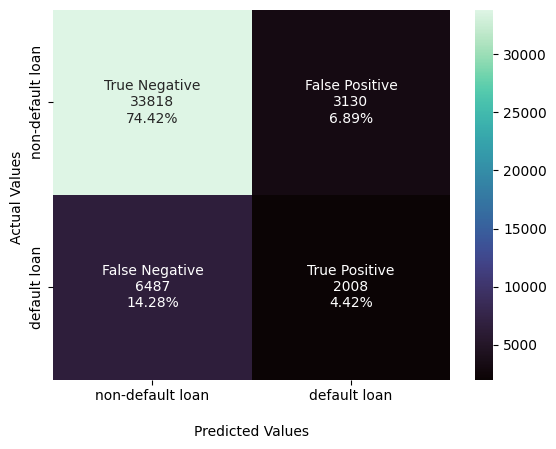

In [220]:
c_matrix_plot(y_test, y_pred)

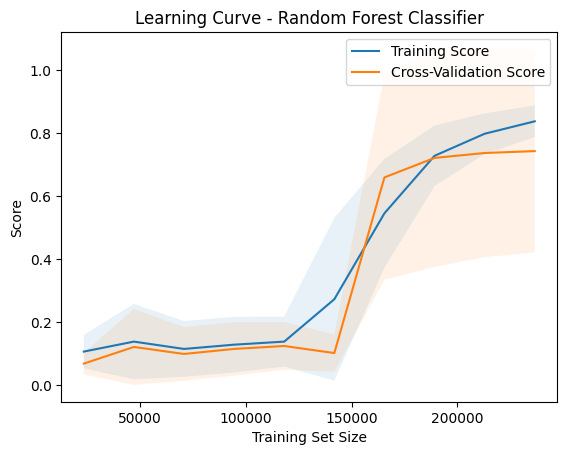

In [228]:
# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    b_abc, x_train_20_res, y_train_20_res, cv=5, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the test scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - AdaBoost Classifier')
plt.legend()
plt.show()

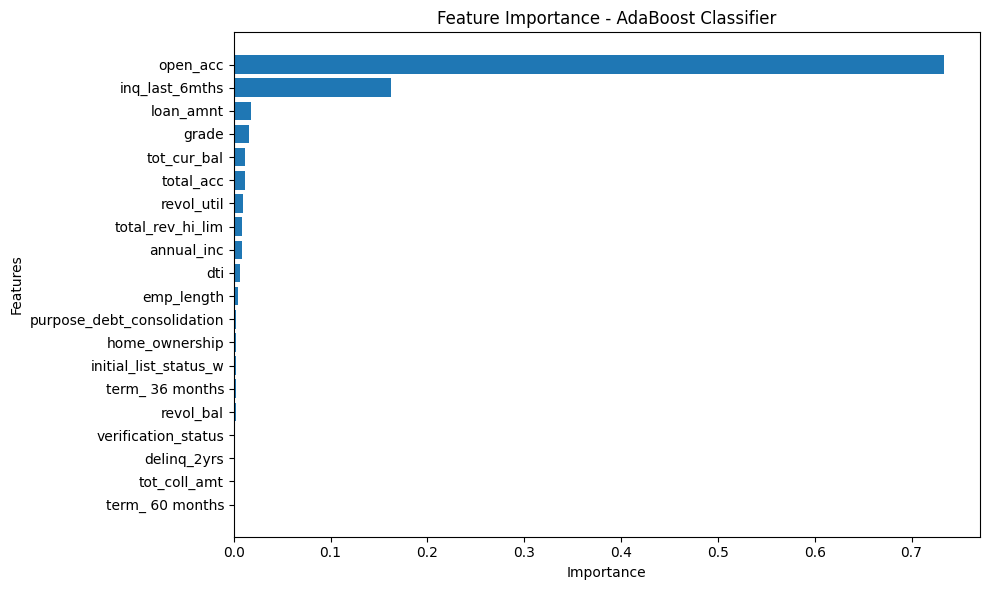

In [244]:
# # Train the Random Forest classifier with the best hyperparameters
# b_abc.fit(x_train_20_res, y_train_20_res)

# Get feature importances
feature_importances = b_abc.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the names of the features
feature_names = x_train_20_res.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices][::-1])
plt.yticks(range(len(feature_importances)), feature_names[sorted_indices][::-1])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance - AdaBoost Classifier')
plt.tight_layout()
plt.show()

##### 3.6.2 Random Forest Hyperparameter Tuning

In [246]:
rfc = RandomForestClassifier()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['max_features'] = ['sqrt', 'log2', None]
grid['max_depth'] = [9, 12, 15]
grid['max_leaf_nodes'] = [9, 12, 15]

# define the rs search procedure
rs_search = RandomizedSearchCV(estimator=rfc, param_distributions=grid, n_jobs=-1, cv=5, scoring='f1')

# execute the rs search
rs_result = rs_search.fit(x_train_20_res, y_train_20_res)

# summarize the best score and configuration
print("Best: %f using %s" % (rs_result.best_score_, rs_result.best_params_))


Best: 0.671091 using {'n_estimators': 500, 'max_leaf_nodes': 15, 'max_features': 'sqrt', 'max_depth': 12}


In [247]:
# input best_params_ to new classifier
rfc = RandomForestClassifier(
                            n_estimators=500,
                            max_features='sqrt',
                            max_depth=12,
                            max_leaf_nodes=15
                            ) 

# fit pipeline to data train
rfc.fit(x_train_20_res, y_train_20_res)

# evaluate model
y_train_pred = rfc.predict(x_train_20_res)
y_pred = rfc.predict(x_test_20)


In [250]:
from sklearn.metrics._classification import classification_report

target_names = ['good_loan', 'bad_loan']

print(classification_report(y_test, y_pred, digits=3, target_names= target_names))

              precision    recall  f1-score   support

   good_loan      0.880     0.676     0.765     36948
    bad_loan      0.299     0.600     0.399      8495

    accuracy                          0.662     45443
   macro avg      0.590     0.638     0.582     45443
weighted avg      0.772     0.662     0.696     45443



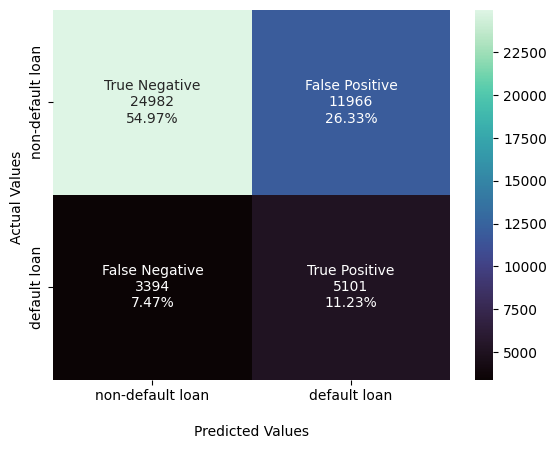

In [251]:
c_matrix_plot(y_test, y_pred)

### Sources

1. https://www.researchgate.net/publication/327787704/figure/tbl1/AS:673118972559377@1537495477959/Loan-statuses-in-LendingClub.png
2. http://kb.lendingclub.com/investor/articles/Investor/What-do-the-different-Note-statuses-mean/
3. https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/#h-smote-synthetic-minority-oversampling-technique